===========================================================================================================================================================

**Milestone 2**

Nama : Bayu Putradana

Batch : FTDS - 032

`Milestone 2 ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 1.`

===========================================================================================================================================================

## i. Perkenalan


## Identitas
Nama  : Bayu Putradana

Batch : FTDS 032

## Gambaran Dataset
Dataset yang digunakan adalah **Weather Dataset in Australia** yang dapat diakses melalui Kaggle:  
[Rain in Australia - Kaggle](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)  

Dataset ini berisi sekitar 10 tahun data observasi cuaca harian dari berbagai lokasi di Australia.  
Variabel target utama adalah **`RainTomorrow`**, yang bernilai *Yes* jika hujan ≥ 1mm akan terjadi keesokan harinya, dan *No* jika tidak.  
Total data memiliki 145.460 baris dengan 23 kolom yang mencakup informasi suhu, kelembapan, tekanan udara, arah angin, curah hujan, dan kondisi cuaca lainnya.  

## Objective
Milestone 2 ini dibuat dengan tujuan sebagai berikut:
- Mampu memahami konsep **Machine Learning** secara keseluruhan.  
- Mampu mempersiapkan data untuk digunakan dalam model **Supervised Learning (Classification pada kasus dataset yg dipilih)**.  
- Mampu mengimplementasikan **Supervised Learning (Classification)** dengan data yang dipilih.  
- Mampu melakukan **Hyperparameter Tuning dan Model Improvement**.  
- Mampu melakukan **Model Deployment**.  

Secara khusus pada dataset ini, tujuan dari modeling adalah:  
- **Membangun model klasifikasi biner (Binary Classification Model)** untuk memprediksi apakah **akan hujan pada keesokan hari (`RainTomorrow`)** berdasarkan kondisi cuaca hari ini.  
- Model yang dibangun akan memberikan hasil prediksi *Yes/No* terhadap hujan esok hari.  
 - Evaluasi model akan dilakukan menggunakan metrik klasifikasi seperti **Accuracy, Precision, Recall, F1-score, dan ROC-AUC**.  

Dengan demikian, milestone ini tidak hanya berfokus pada eksplorasi data, tetapi juga pada **pengembangan model prediktif** yang dapat membantu memberikan insight praktis, misalnya sebagai sistem rekomendasi sederhana untuk memutuskan apakah perlu membawa payung esok hari.

## ii. Import Libraries

In [1]:
!pip install feature-engine


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import pickle
import json
import os
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, cross_validate
from sklearn.utils import shuffle
from sklearn.impute import SimpleImputer
from google.colab import drive, files

## iii. Data Loading

In [3]:
# Mount Google Drive
drive.mount('/content/drive')

# Path file CSV
csv_path = '/content/drive/MyDrive/weatherAUS.csv'

# Load dataset
df_weather = pd.read_csv(csv_path)
print("Shape dataset:", df_weather.shape)
df_weather.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape dataset: (145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Cek ukuran dataset
print("=== Ukuran Dataset ===")
print(df_weather.shape)
print()

=== Ukuran Dataset ===
(145460, 23)



In [5]:
# Cek nama kolom

print("=== Nama Kolom ===")
print(df_weather.columns)
print()

=== Nama Kolom ===
Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')



In [6]:
# Cek data duplikat
print("=== Jumlah Data Duplikat ===")
print(df_weather.duplicated().sum())
print()

=== Jumlah Data Duplikat ===
0



In [7]:
# Cek tipe data dan jumlah non-null
print("=== Info Dataset ===")
print(df_weather.info())
print()

=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am

In [8]:
# Cek missing values
print("=== Missing Values per Kolom ===")
print(df_weather.isnull().sum())
print()

=== Missing Values per Kolom ===
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64



### Pemeriksaan Tipe Data dan Missing Values

Berdasarkan hasil `df.info()`, dataset *Weather in Australia* memiliki **23 kolom** dengan kombinasi:
- **16 kolom numerik** (`float64`), contohnya: `MinTemp`, `MaxTemp`, `Rainfall`, `Humidity9am`, `Pressure3pm`.
- **7 kolom kategorikal** (`object`), contohnya: `Date`, `Location`, `WindGustDir`, `RainToday`, `RainTomorrow`.

Informasi jumlah **non-null values** menunjukkan seberapa banyak data yang tersedia di setiap kolom. Selisih antara jumlah total baris (145,460) dan jumlah non-null pada sebuah kolom mengindikasikan adanya **missing values**.  

Dari hasil `df.isnull().sum()`, beberapa kolom dengan missing values yang cukup besar antara lain:
- `Sunshine` (69,835 missing values)
- `Evaporation` (62,790 missing values)
- `Cloud3pm` (59,358 missing values)
- `Cloud9am` (55,888 missing values)

Sementara beberapa kolom hanya memiliki sedikit missing values, misalnya:
- `MaxTemp` (1,261 missing values)
- `MinTemp` (1,485 missing values)

Dengan demikian, terdapat hubungan langsung antara output **tipe data** dan **missing values**:
- **Tipe data numerik** yang memiliki missing values dapat diisi dengan teknik imputasi (mean, median, atau interpolasi).
- **Tipe data kategorikal** yang memiliki missing values dapat diisi dengan modus (nilai yang paling sering muncul).
- Kolom dengan missing values yang sangat tinggi (misalnya lebih dari 40% data hilang) perlu dipertimbangkan apakah akan tetap digunakan atau dibuang agar tidak mengganggu kualitas model.

Langkah ini penting sebelum melakukan EDA, agar analisis visualisasi tidak bias akibat data yang hilang.


In [9]:
# Cek statistik deskriptif
print("=== Statistik Deskriptif (Numerik) ===")
display(df_weather.describe())

=== Statistik Deskriptif (Numerik) ===


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### Data Cleaning

In [10]:
# 1. Definisikan dataset dulu
weather = pd.read_csv(csv_path)

In [11]:
def clean_dtypes(df):
    """
    Fungsi untuk merapikan tipe data pada dataset cuaca Australia

    - Ubah kolom Date menjadi datetime
    - Ubah kolom RainToday dan RainTomorrow menjadi kategori (Yes/No)
    """
    # Ubah kolom Date jadi datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Ubah kolom RainToday & RainTomorrow jadi category
    if 'RainToday' in df.columns:
        df['RainToday'] = df['RainToday'].astype('category')
    if 'RainTomorrow' in df.columns:
        df['RainTomorrow'] = df['RainTomorrow'].astype('category')

    return df

# Pemanggilan fungsi
weather = clean_dtypes(weather)

# Cek ulang hasilnya
print(weather.info())
print(weather[['Date','RainToday','RainTomorrow']].head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [12]:
# Tangani missing values
# - untuk numerik: isi dengan median
# - untuk kategorikal: isi dengan modus (nilai terbanyak)

for col in df_weather.columns:
    if df_weather[col].dtype in ["float64", "int64"]:
        df_weather[col].fillna(df_weather[col].median())
    else:
        df_weather[col].fillna(df_weather[col].mode()[0])

print("=== Missing Values Setelah Ditangani ===")
print(df_weather.isnull().sum())
print()

=== Missing Values Setelah Ditangani ===
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64



### Statistik Deskriptif Setelah Cleaning

In [13]:
# Statistik deskriptif setelah cleaning

print("=== Statistik Deskriptif (Numerik) Setelah Cleaning ===")
display(df_weather.describe())

=== Statistik Deskriptif (Numerik) Setelah Cleaning ===


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## iv. Exploratory Data Analysis

### 1. Distribusi Data
Melihat distribusi variabel numerik seperti suhu, kelembapan, dan curah hujan.

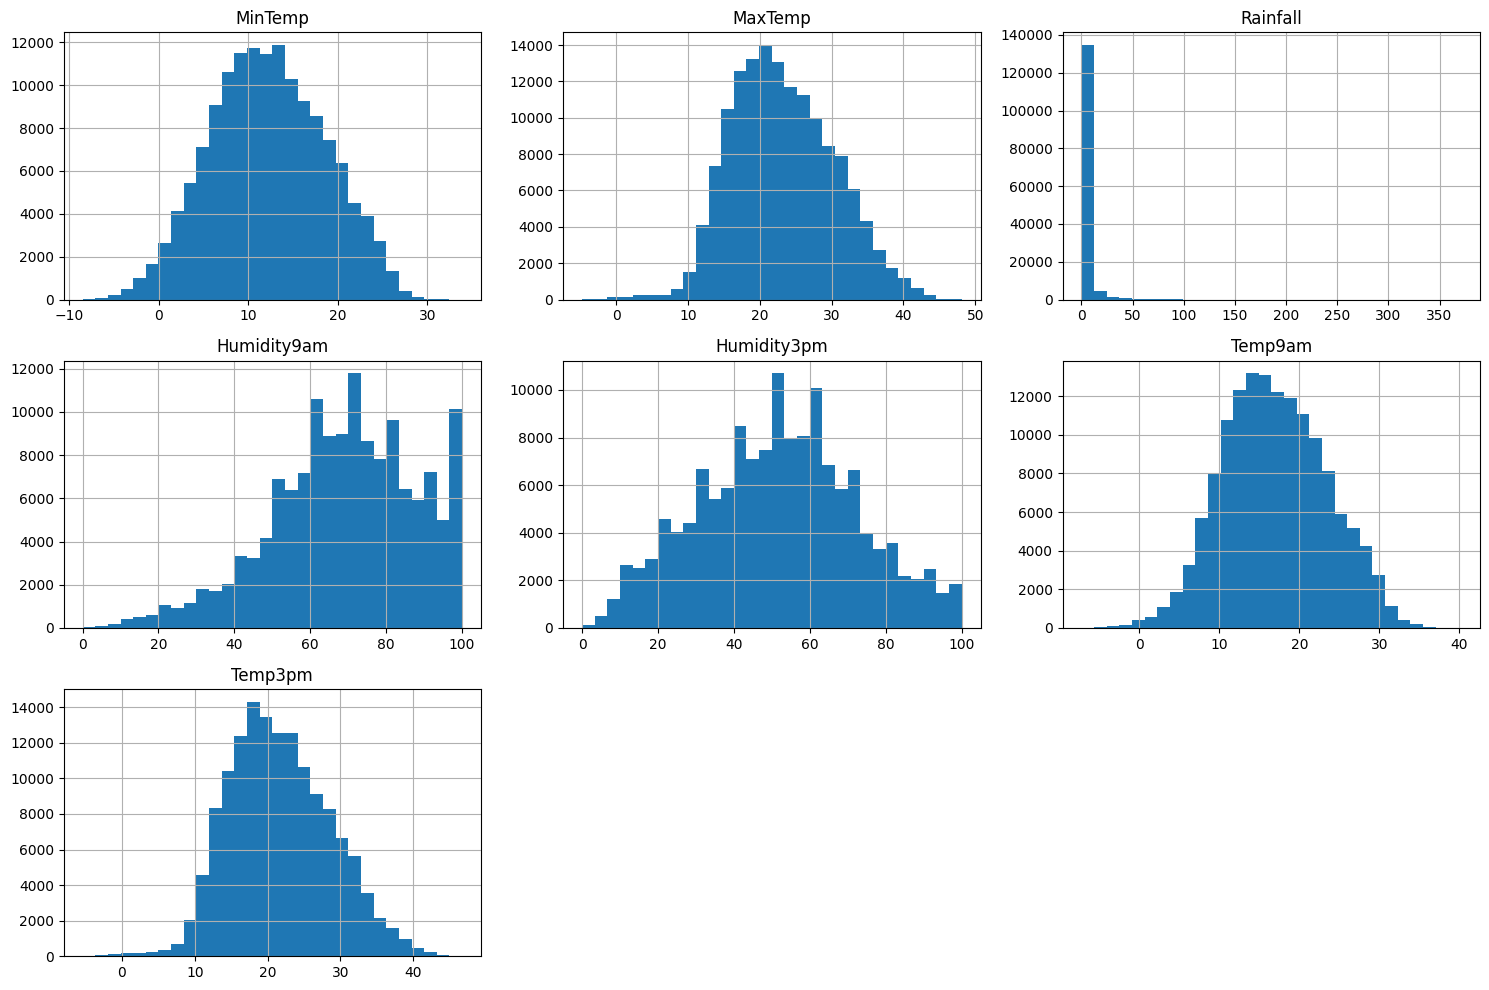

In [14]:
# Histogram untuk numeric columns :

numeric_cols = ['MinTemp','MaxTemp','Rainfall','Humidity9am','Humidity3pm','Temp9am','Temp3pm']
df_weather[numeric_cols].hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

### Insight EDA 1: Exploratory Data Analysis Histogram Distribusi Kolom Numerik

Histogram berikut menampilkan distribusi beberapa variabel numerik utama pada dataset cuaca Australia:

| Kolom | Insight |
|-------|----------|
| **MinTemp** | Distribusi menyerupai normal dengan puncak di sekitar 10–15°C. Menunjukkan mayoritas hari memiliki suhu minimum di kisaran tersebut. |
| **MaxTemp** | Distribusi juga mendekati normal dengan nilai tengah sekitar 20–25°C. Artinya suhu maksimum harian di sebagian besar wilayah Australia cenderung stabil di rentang tersebut. |
| **Rainfall** | Distribusinya sangat *right-skewed*, di mana sebagian besar nilai curah hujan berada di sekitar 0 mm. Ini menunjukkan bahwa hari tanpa hujan jauh lebih sering dibandingkan hari dengan hujan lebat. |
| **Humidity9am** | Menggambarkan tingkat kelembapan udara pada pukul 09.00 pagi (%). Distribusi cukup lebar dengan dua puncak (bimodal), mengindikasikan perbedaan kondisi kelembapan antara lokasi atau musim. Nilai dominan berada di kisaran 60–80%. |
| **Humidity3pm** | Menunjukkan kelembapan udara pada pukul 15.00 sore (%). Distribusinya mendatar dan bervariasi, dengan nilai umum di kisaran 40–70%. Hal ini menunjukkan bahwa kelembapan sore hari cenderung turun karena suhu yang meningkat. |
| **Temp9am** | Menunjukkan suhu udara pada pukul 09.00 pagi (°C). Distribusi mendekati normal dengan rata-rata sekitar 15–20°C, menandakan suhu pagi hari relatif stabil di sebagian besar wilayah. |
| **Temp3pm** | Menunjukkan suhu udara pada pukul 15.00 sore (°C). Distribusinya juga menyerupai normal dengan rata-rata sekitar 20–25°C. Ini merupakan indikator penting karena suhu sore sering digunakan untuk menentukan kondisi cuaca harian. |

### Kesimpulan EDA 1:
- Sebagian besar fitur suhu (**MinTemp, MaxTemp, Temp9am, Temp3pm**) memiliki **distribusi mendekati normal**, sehingga tidak memerlukan transformasi khusus.  
- Fitur **Rainfall** sangat *right-skewed*, menandakan sebagian besar hari tidak hujan dan hanya sedikit hari dengan curah hujan tinggi.  
- Fitur kelembapan (**Humidity9am dan Humidity3pm**) menunjukkan variasi cukup tinggi, mengindikasikan perbedaan kondisi antar waktu atau lokasi.  
- Secara keseluruhan, pola distribusi ini menggambarkan karakteristik alami iklim Australia, di mana suhu relatif stabil tetapi curah hujan dan kelembapan sangat bervariasi.


## 2. Korelasi Antar Fitur
Menganalisis hubungan antar variabel numerik menggunakan korelasi.

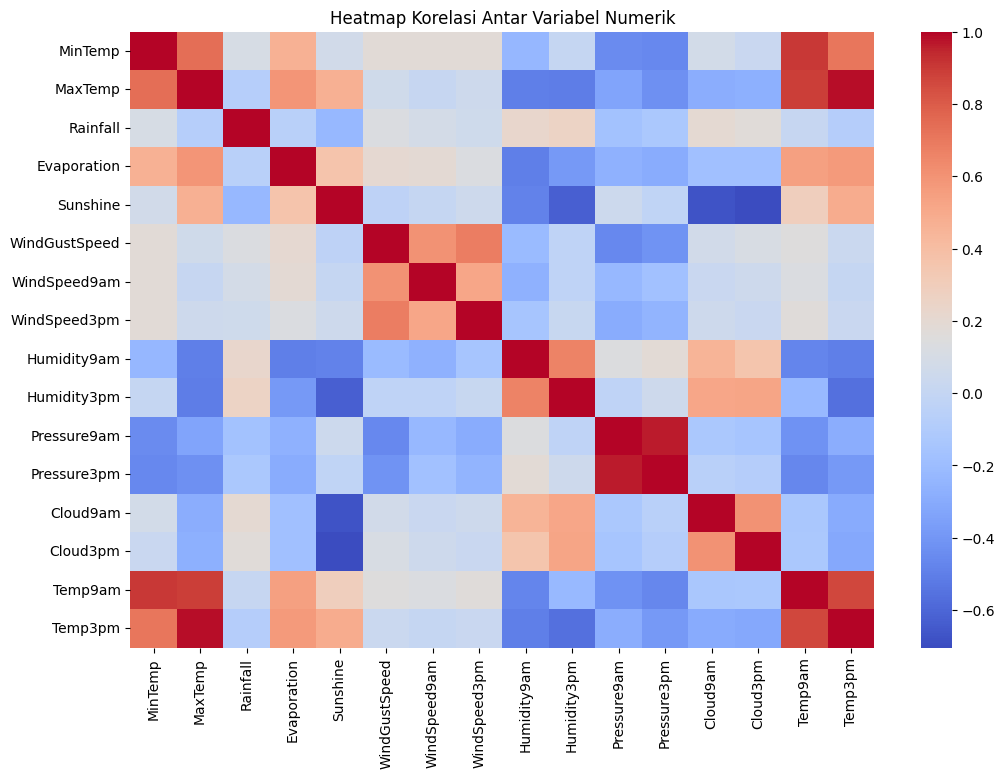

In [15]:
plt.figure(figsize=(12,8))
corr = df_weather.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

### Insight EDA 2: Heatmap Korelasi Antar Variabel Numerik

Visualisasi heatmap berikut menampilkan **hubungan korelasi antar variabel numerik** dalam dataset cuaca Australia.  
Korelasi dihitung menggunakan metode Pearson, di mana:
- Nilai **+1** menunjukkan korelasi positif sempurna (dua variabel naik bersama),
- Nilai **–1** menunjukkan korelasi negatif sempurna (satu naik, yang lain turun),
- Nilai **0** berarti tidak ada hubungan linear yang kuat.

### Interpretasi Utama
| Korelasi | Penjelasan |
|-----------|-------------|
| **MinTemp ↔ MaxTemp (positif kuat)** | Suhu minimum dan maksimum memiliki hubungan kuat. Ketika suhu minimum naik, suhu maksimum pada hari tersebut juga cenderung meningkat. Hal ini wajar karena dipengaruhi kondisi iklim dan musim. |
| **Temp9am ↔ Temp3pm (positif kuat)** | Korelasi tinggi antara suhu pagi dan sore menunjukkan pola suhu harian yang konsisten; hari yang panas di pagi hari biasanya tetap hangat hingga sore. |
| **Humidity9am ↔ Humidity3pm (positif sedang)** | Kelembapan pagi dan sore hari cenderung saling berhubungan, meskipun kelembapan sore sedikit lebih rendah akibat peningkatan suhu siang hari. |
| **Pressure9am ↔ Pressure3pm (positif sangat kuat)** | Tekanan udara pagi dan sore sangat berkorelasi karena perubahan tekanan harian biasanya kecil. Ini menunjukkan kestabilan atmosfer di sebagian besar hari. |
| **Rainfall ↔ Humidity3pm (positif sedang)** | Hari dengan curah hujan tinggi umumnya diikuti kelembapan udara sore yang tinggi. Ini menunjukkan bahwa kelembapan merupakan salah satu indikator penting dalam prediksi hujan. |
| **Rainfall ↔ Sunshine (negatif sedang)** | Ketika curah hujan meningkat, durasi sinar matahari cenderung menurun. Korelasi negatif ini menggambarkan logika cuaca yang wajar. |
| **Cloud3pm ↔ Sunshine (negatif kuat)** | Banyaknya awan di sore hari secara langsung menurunkan jumlah sinar matahari yang diterima. Variabel ini juga berpotensi menjadi prediktor kuat untuk hujan. |
| **WindSpeed9am ↔ WindSpeed3pm (positif sedang)** | Kecepatan angin pada pagi dan sore hari memiliki hubungan sedang, menunjukkan pola sirkulasi angin yang relatif stabil dalam sehari. |

### Kesimpulan EDA Heatmap
- Korelasi tinggi antar variabel suhu (**MinTemp, MaxTemp, Temp9am, Temp3pm**) menunjukkan bahwa hanya sebagian dari variabel ini mungkin cukup digunakan untuk mewakili pola suhu tanpa menyebabkan **multikolinearitas** berlebih.  
- **Humidity3pm**, **Rainfall**, dan **Cloud3pm** tampak memiliki hubungan yang relevan dengan curah hujan dan berpotensi menjadi **fitur penting untuk prediksi RainTomorrow**.  
- Variabel tekanan udara (**Pressure9am dan Pressure3pm**) menunjukkan kestabilan tinggi, namun pengaruhnya terhadap hujan perlu diuji lebih lanjut pada tahap modeling.  
- Pola korelasi ini memberikan dasar kuat untuk pemilihan fitur (*feature selection*) dan pemahaman keterkaitan antar variabel cuaca di Australia.


## 3. Grouping & Query
Mengecek rata-rata kondisi cuaca berdasarkan lokasi dan target hujan.

In [16]:
# Rata-rata kondisi per lokasi
location_group = df_weather.groupby("Location")[["Rainfall","Humidity3pm","Temp3pm"]].mean().sort_values("Rainfall", ascending=False)
display(location_group.head())

# Rata-rata kondisi berdasarkan RainTomorrow
rain_group = df_weather.groupby("RainTomorrow")[["Rainfall","Humidity3pm","Temp3pm"]].mean()
display(rain_group)


,Rainfall,Humidity3pm,Temp3pm
Location,,,
Cairns,5.742035,61.751645,27.909112
Darwin,5.092452,51.827954,31.082733
CoffsHarbour,5.061497,62.351858,22.343873
GoldCoast,3.769396,62.980515,23.771603
Wollongong,3.594903,65.128571,19.934872


,Rainfall,Humidity3pm,Temp3pm
RainTomorrow,,,
No,1.270290,46.510625,22.402905
Yes,6.142104,68.800019,19.197113


### Insight EDA 3: Rata-rata Kondisi Cuaca Berdasarkan Lokasi dan Target Hujan

### Berdasarkan Lokasi
Tabel berikut menunjukkan rata-rata **curah hujan (Rainfall)**, **kelembapan sore (Humidity3pm)**, dan **suhu sore (Temp3pm)** di beberapa kota di Australia.

| Lokasi | Rata-rata Curah Hujan | Rata-rata Kelembapan 3PM | Rata-rata Suhu 3PM |
|---------|------------------------|--------------------------|--------------------|
| **Cairns** | 5.74 mm | 61.75% | 27.91°C |
| **Darwin** | 5.09 mm | 51.83% | 31.08°C |
| **CoffsHarbour** | 5.06 mm | 62.35% | 22.34°C |
| **GoldCoast** | 3.77 mm | 62.98% | 23.77°C |
| **Wollongong** | 3.59 mm | 65.13% | 19.93°C |

### Insight Berdasarkan Lokasi
- **Cairns dan Darwin** memiliki curah hujan tinggi serta suhu sore yang lebih hangat dibandingkan lokasi lain — menunjukkan iklim tropis lembap.  
- **Wollongong** dan **CoffsHarbour** cenderung lebih sejuk namun memiliki kelembapan yang lebih tinggi, menandakan area dengan udara lembap meski tidak selalu panas.  
- Pola ini menunjukkan bahwa lokasi geografis mempengaruhi pola cuaca dan potensi hujan di hari berikutnya.

---

### Berdasarkan Target `RainTomorrow`
| RainTomorrow | Rata-rata Curah Hujan Hari Ini | Kelembapan 3PM | Suhu 3PM |
|---------------|--------------------------------|----------------|-----------|
| **No** | 1.27 mm | 46.51% | 22.40°C |
| **Yes** | 6.14 mm | 68.80% | 19.20°C |

### Insight Berdasarkan Target
- Saat **RainTomorrow = Yes**, rata-rata curah hujan hari ini jauh lebih tinggi (≈6.14 mm) dibandingkan kondisi **No** (≈1.27 mm).  
  → Ini menunjukkan **Rainfall hari ini** merupakan salah satu indikator kuat untuk memprediksi hujan esok hari.  
- **Humidity3pm** juga meningkat signifikan (dari 46.5% → 68.8%) ketika hujan akan turun keesokan harinya, memperkuat hubungan antara **kelembapan sore** dengan potensi hujan.  
- Sebaliknya, **suhu sore (Temp3pm)** lebih rendah pada hari yang diikuti hujan besoknya — kondisi udara lebih dingin sering terjadi menjelang hujan.

---

### Kesimpulan
Secara keseluruhan, variabel **Rainfall**, **Humidity3pm**, dan **Temp3pm** menunjukkan perbedaan jelas antara kondisi “hujan” dan “tidak hujan” pada keesokan hari.  
Hal ini mengindikasikan bahwa ketiganya adalah **fitur penting (key predictors)** yang akan sangat berpengaruh pada performa model klasifikasi **RainTomorrow**.


## 4. Analisis Target `RainTomorrow`
Melihat distribusi target dan perbandingan kondisi cuaca pada hari hujan vs tidak hujan.

RainTomorrow
No     0.775819
Yes    0.224181
Name: proportion, dtype: float64


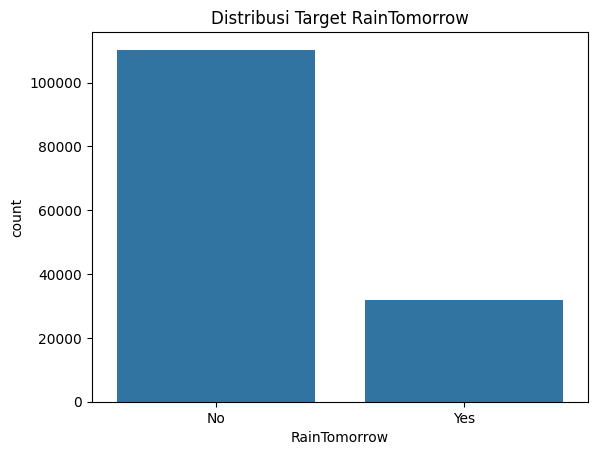

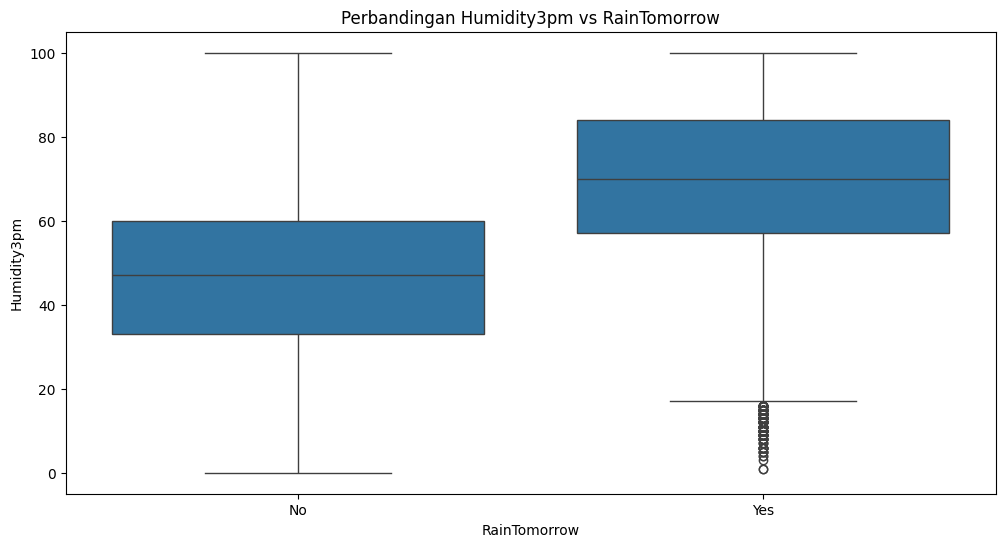

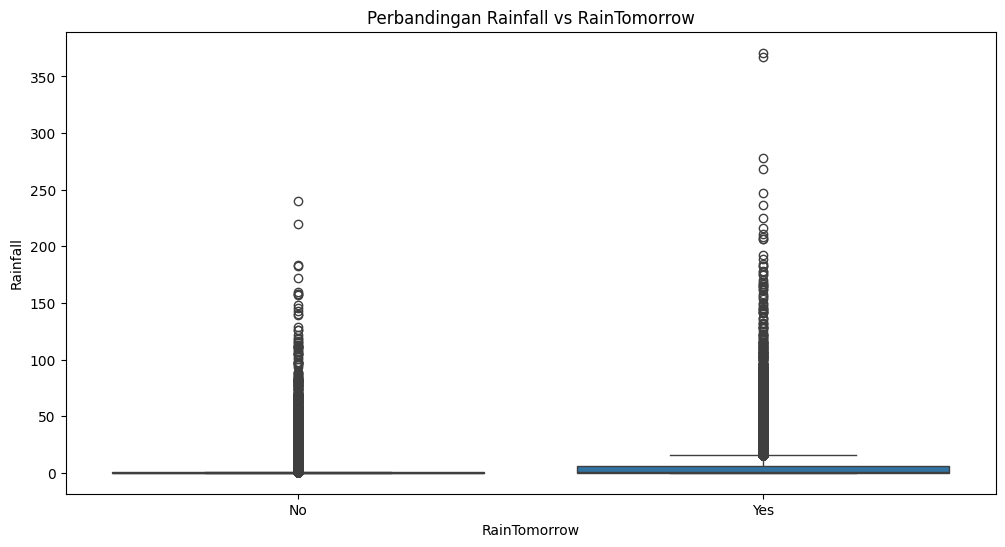

In [17]:
# Distribusi target
print(df_weather["RainTomorrow"].value_counts(normalize=True))

sns.countplot(x="RainTomorrow", data=df_weather)
plt.title("Distribusi Target RainTomorrow")
plt.show()

# Boxplot perbandingan variabel numerik dengan target
plt.figure(figsize=(12,6))
sns.boxplot(x="RainTomorrow", y="Humidity3pm", data=df_weather)
plt.title("Perbandingan Humidity3pm vs RainTomorrow")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="RainTomorrow", y="Rainfall", data=df_weather)
plt.title("Perbandingan Rainfall vs RainTomorrow")
plt.show()


### Insight EDA 4: Distribusi Target dan Kondisi Cuaca Berdasarkan RainTomorrow

### Distribusi Target `RainTomorrow`
Hasil distribusi target menunjukkan bahwa proporsi data **tidak seimbang (imbalanced)**:
- **No (Tidak Hujan Besok): 77.6%**
- **Yes (Akan Hujan Besok): 22.4%**

Artinya, sebagian besar hari **tidak diikuti oleh hujan pada hari berikutnya**. Hal ini penting diperhatikan saat melakukan modeling agar tidak terjadi bias terhadap kelas mayoritas.

---

### Perbandingan `Humidity3pm` vs `RainTomorrow`
Dari boxplot terlihat bahwa:
- Ketika **RainTomorrow = Yes**, nilai **Humidity3pm** (kelembapan sore hari) **lebih tinggi secara signifikan**, dengan median sekitar **70%**.
- Sebaliknya, untuk **RainTomorrow = No**, median kelembapan hanya sekitar **45%**.
- Terlihat juga beberapa outlier pada kategori “Yes”, menandakan ada beberapa kasus dengan kelembapan ekstrem.

**Insight:** Kelembapan sore hari merupakan **indikator penting** yang berhubungan erat dengan kemungkinan hujan keesokan harinya.

---

### Perbandingan `Rainfall` vs `RainTomorrow`
Dari boxplot berikut:
- Saat **RainTomorrow = Yes**, nilai **Rainfall** (curah hujan hari ini) **lebih tinggi** dibandingkan kondisi “No”.
- Hal ini logis karena **curah hujan hari ini sering menjadi pola cuaca berlanjut**, yang dapat memicu hujan kembali di hari berikutnya.
- Banyak outlier pada kedua sisi menandakan adanya variasi tinggi dalam curah hujan antar hari.

**Insight:** Nilai **Rainfall hari ini** dapat menjadi **prediktor kuat** untuk menentukan apakah akan hujan besok.

---

### Kesimpulan Sementara
- Dataset memiliki **ketidakseimbangan target**, dengan mayoritas hari tanpa hujan.  
- **Kelembapan sore (Humidity3pm)** dan **curah hujan hari ini (Rainfall)** menunjukkan perbedaan jelas antara hari yang akan hujan dan yang tidak.  
- Kedua variabel ini berpotensi menjadi **fitur penting dalam model prediksi hujan besok**.

---


## 5. Analisis Tren Waktu (Time Series Trend)

Karena data cuaca bersifat temporal, penting untuk melihat bagaimana variabel seperti `Rainfall` dan `Temp3pm`  
berubah dari waktu ke waktu. Analisis ini membantu memahami pola musiman dan fluktuasi jangka panjang.


/tmp/ipython-input-1623234020.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = df_weather.resample('M', on='Date')[['Rainfall', 'Temp3pm']].mean()


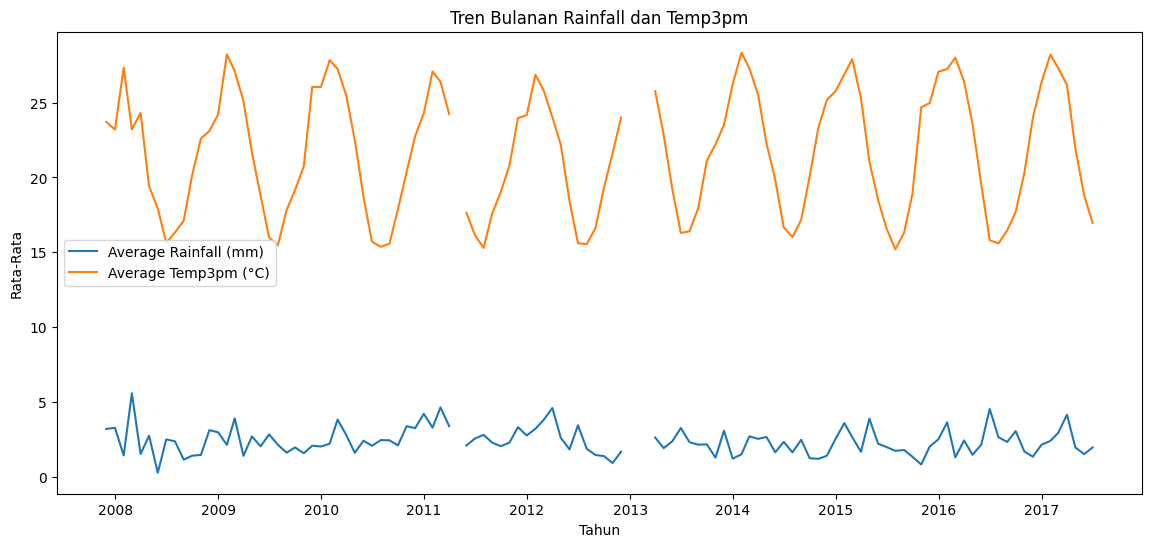

In [18]:
# Pastikan kolom Date bertipe datetime
df_weather['Date'] = pd.to_datetime(df_weather['Date'])

# Agregasi rata-rata per bulan untuk visualisasi tren
monthly_trend = df_weather.resample('M', on='Date')[['Rainfall', 'Temp3pm']].mean()

# Plot tren Rainfall dan Temp3pm
plt.figure(figsize=(14,6))
plt.plot(monthly_trend.index, monthly_trend['Rainfall'], label='Average Rainfall (mm)')
plt.plot(monthly_trend.index, monthly_trend['Temp3pm'], label='Average Temp3pm (°C)')
plt.title("Tren Bulanan Rainfall dan Temp3pm")
plt.xlabel("Tahun")
plt.ylabel("Rata-Rata")
plt.legend()
plt.show()


### Insight EDA 5 — Analisis Tren Waktu (Time Series Trend)

Dari visualisasi tren waktu di atas, terlihat bahwa:

- **Suhu sore hari (`Temp3pm`) menunjukkan pola musiman yang konsisten setiap tahun**, dengan fluktuasi yang jelas antara musim panas dan musim dingin.  
  Nilai suhu cenderung meningkat pada pertengahan tahun (sekitar Desember–Februari) dan menurun pada pertengahan tahun berikutnya (Juni–Agustus), mencerminkan siklus iklim khas Australia di belahan bumi selatan.

- **Curah hujan (`Rainfall`) tampak lebih bervariasi dan tidak memiliki pola musiman yang sekuat suhu.**  
  Meski demikian, terdapat beberapa puncak curah hujan yang terjadi secara periodik, mengindikasikan adanya musim hujan di beberapa wilayah atau tahun tertentu.

- **Interpretasi umum:**  
  Variabel suhu memiliki kestabilan musiman yang kuat, sedangkan curah hujan lebih fluktuatif. Hal ini menunjukkan bahwa **perubahan suhu harian dapat menjadi indikator sekunder**, namun **pola hujan lebih sulit diprediksi karena faktor atmosfer lain seperti tekanan dan arah angin**.

Insight ini mendukung perlunya model prediktif berbasis machine learning, karena hubungan antar variabel cuaca terhadap hujan **tidak bersifat linear dan sulit dipahami hanya dengan visualisasi tren.**


## 6. Analisis Distribusi Arah Angin (Wind Direction Analysis)

Arah angin dapat berpengaruh terhadap kemungkinan hujan.  
Analisis ini melihat distribusi arah angin maksimum (`WindGustDir`) untuk memahami arah dominan yang sering muncul,  
serta perbandingan antara kondisi hujan dan tidak hujan berdasarkan arah angin tersebut.


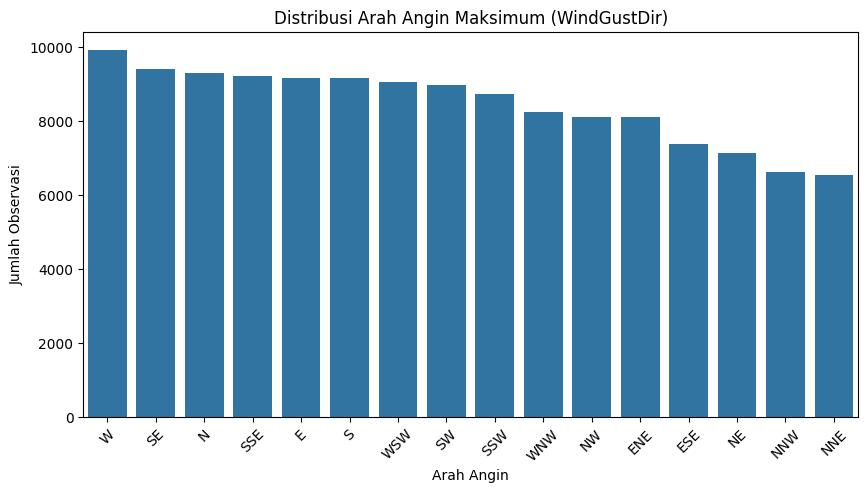

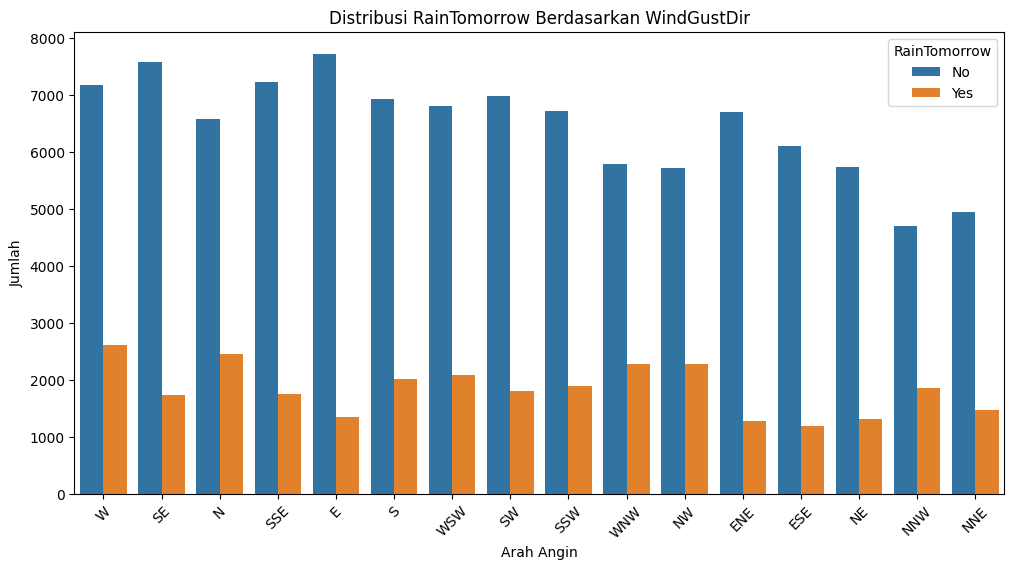

In [19]:
# Distribusi arah angin maksimum secara umum
plt.figure(figsize=(10,5))
sns.countplot(x='WindGustDir', data=df_weather, order=df_weather['WindGustDir'].value_counts().index)
plt.title("Distribusi Arah Angin Maksimum (WindGustDir)")
plt.xlabel("Arah Angin")
plt.ylabel("Jumlah Observasi")
plt.xticks(rotation=45)
plt.show()

# Perbandingan arah angin terhadap RainTomorrow
plt.figure(figsize=(12,6))
sns.countplot(x='WindGustDir', hue='RainTomorrow', data=df_weather,
              order=df_weather['WindGustDir'].value_counts().index)
plt.title("Distribusi RainTomorrow Berdasarkan WindGustDir")
plt.xlabel("Arah Angin")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.legend(title='RainTomorrow')
plt.show()


### Insight EDA 6 — Distribusi Arah Angin Maksimum (WindGustDir)

Dari visualisasi distribusi arah angin maksimum di atas, terlihat bahwa:

- **Arah angin dari barat (W)** mendominasi seluruh pengamatan, dengan jumlah observasi yang jauh lebih tinggi dibandingkan arah lainnya.  
  Hal ini menunjukkan bahwa angin dari arah barat merupakan arah dominan dalam pola cuaca yang tercatat.

- Ketika dibandingkan berdasarkan kondisi **RainTomorrow**, terlihat bahwa **hujan keesokan hari lebih sering terjadi ketika arah angin maksimum berasal dari barat (W)**.  
  Arah dari **barat daya hingga barat laut (SW–WNW)** juga menunjukkan kontribusi yang cukup besar terhadap terjadinya hujan, meskipun tidak sebesar arah barat utama.

- **Arah dari timur hingga timur laut (E–NE)** memiliki jumlah observasi yang relatif rendah, baik untuk kondisi hujan maupun tidak hujan, menandakan arah ini jarang menjadi dominan dalam peristiwa cuaca ekstrem.

- **Interpretasi umum:**  
  Arah angin maksimum memiliki keterkaitan kuat dengan kemungkinan hujan di hari berikutnya. Dominasi angin dari barat dapat mengindikasikan **pergerakan massa udara lembap dari laut menuju daratan**, yang berpotensi membawa curah hujan.  
  Oleh karena itu, variabel `WindGustDir` dapat dianggap sebagai **fitur penting dalam model prediksi hujan**, karena menggambarkan arah utama datangnya sistem cuaca yang mempengaruhi curah hujan.


## 7. Analisis Hubungan Tekanan Udara dan Hujan (Pressure vs RainTomorrow)

Tekanan udara (`Pressure9am`, `Pressure3pm`) sering menjadi indikator penting kondisi atmosfer.  
Analisis ini melihat perbedaan distribusi tekanan udara antara hari hujan dan tidak hujan.


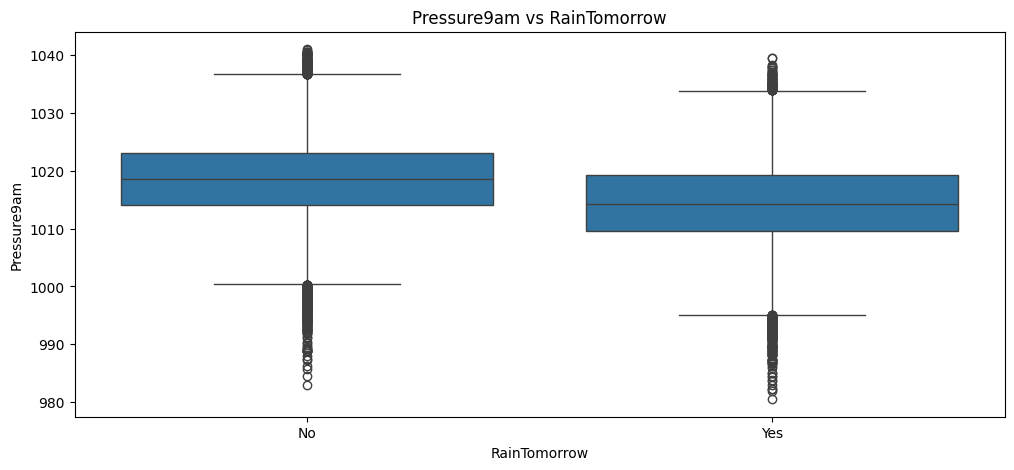

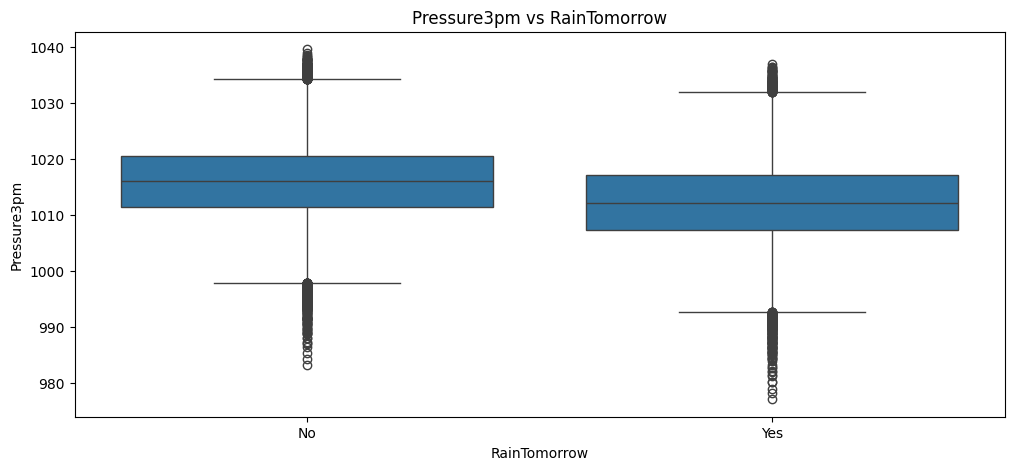

In [20]:
# Boxplot tekanan udara pagi dan sore berdasarkan target hujan
plt.figure(figsize=(12,5))
sns.boxplot(x='RainTomorrow', y='Pressure9am', data=df_weather)
plt.title("Pressure9am vs RainTomorrow")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x='RainTomorrow', y='Pressure3pm', data=df_weather)
plt.title("Pressure3pm vs RainTomorrow")
plt.show()


### Insight EDA 7 — Analisis Tekanan Udara (Pressure9am dan Pressure3pm) terhadap RainTomorrow

Dari visualisasi boxplot di atas, terlihat bahwa:

- **Tekanan udara pagi (`Pressure9am`) dan sore (`Pressure3pm`) cenderung lebih rendah pada hari-hari yang diikuti oleh hujan (`RainTomorrow = 1`)** dibandingkan dengan hari tanpa hujan (`RainTomorrow = 0`).  
  Median tekanan udara pada hari hujan berada sedikit di bawah 1015 hPa, sedangkan pada hari tidak hujan cenderung berada di atas 1018 hPa.

- **Distribusi tekanan udara juga menunjukkan adanya outlier ke arah bawah**, terutama pada kondisi hujan. Hal ini mungkin menandakan adanya fenomena tekanan rendah ekstrem yang berasosiasi dengan cuaca buruk atau badai lokal.

- **Interpretasi umum:**  
  Tekanan udara rendah sering kali berkaitan dengan pembentukan awan dan peningkatan kelembapan yang berujung pada hujan. Sebaliknya, tekanan udara tinggi cenderung membawa kondisi kering dan stabil.  
  Dengan demikian, **Pressure9am dan Pressure3pm berpotensi menjadi fitur penting dalam memprediksi RainTomorrow**.

Insight ini memperkuat konsep meteorologis bahwa **penurunan tekanan atmosfer adalah indikator potensial dari kemungkinan hujan pada hari berikutnya**.


## v. Feature Engineering

In [21]:
# Reload the dataset
df_weather = pd.read_csv(csv_path)

# Handle missing values (re-running the cleaning step)
for col in df_weather.columns:
    if df_weather[col].dtype in ["float64", "int64"]:
        df_weather[col] = df_weather[col].fillna(df_weather[col].median())
    else:
        df_weather[col] = df_weather[col].fillna(df_weather[col].mode()[0])

# ===== 1. Target Encoding (Ordinal) & Handle Missing Target Values =====
# Drop data with target NaN first
df_weather = df_weather.dropna(subset=["RainTomorrow"])

# Map RainTomorrow to numerical values
df_weather['RainTomorrow'] = df_weather['RainTomorrow'].map({'Yes':1, 'No':0})


# ===== 2. Definisi fitur =====
num_cols = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine',
            'WindGustSpeed','WindSpeed9am','WindSpeed3pm',
            'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm',
            'Cloud9am','Cloud3pm','Temp9am','Temp3pm']
cat_nominal = ['Location','WindGustDir','WindDir9am','WindDir3pm']
cat_ordinal = ['RainToday']  # Yes/No


# ===== 3. Split fitur & target =====
X = df_weather.drop("RainTomorrow", axis=1) # Fitur
y = df_weather["RainTomorrow"]              # Target

# ===== 4. Column Transformer =====
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),          # scale numerik
        ("nom", OneHotEncoder(handle_unknown="ignore"), cat_nominal),  # one-hot encoding
        ("ord", OrdinalEncoder(), cat_ordinal)        # ordinal encoding
    ]
)

# ===== 5. Train-Test Split =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data Train:", X_train.shape, y_train.shape)
print("Data Test:", X_test.shape, y_test.shape)

Data Train: (116368, 22) (116368,)
Data Test: (29092, 22) (29092,)


### Insight Data Train & Data Test

Setelah proses **feature engineering** dan **train-test split**, dataset terbagi sebagai berikut:

- **Data Train:** `(116,368, 22)`
- **Data Test:** `(29,092, 22)`

#### Interpretasi:
- Dataset memiliki **22 fitur (variabel independen)** yang akan digunakan untuk memprediksi target `RainTomorrow`.
- Total data yang digunakan setelah pembersihan adalah **145,460 observasi**.
- Pembagian data menggunakan **rasio 80:20**, di mana:
  - **80% (116,368 baris)** digunakan untuk melatih model agar mengenali pola hujan.
  - **20% (29,092 baris)** disisihkan untuk menguji performa model terhadap data yang belum pernah dilihat sebelumnya.

#### Insight Utama:
- Pembagian data yang seimbang memastikan bahwa model bisa **belajar dengan cukup data**, namun tetap **dapat diuji secara objektif**.
- Ukuran data yang besar (lebih dari 100 ribu baris) memberikan potensi bagi model untuk **menangkap variasi cuaca dengan baik**, asalkan fitur-fitur relevan telah diolah dengan tepat.
- Karena `y` merupakan target biner (`0 = Tidak Hujan`, `1 = Hujan`), model akan dikembangkan sebagai **binary classification problem**.

Dataset sudah siap digunakan untuk tahap selanjutnya yaitu pembuatan pipeline model prediksi hujan (`RainTomorrow`).


### Cek Cardinality pada Fitur Kategorikal

Fungsi berikut digunakan untuk mengecek **cardinality (jumlah kategori unik)** pada setiap kolom bertipe object di `X_train`.  
Hal ini membantu kita mengidentifikasi fitur dengan banyak kategori (high cardinality) yang bisa memengaruhi kompleksitas model.


In [22]:
# ==== Periksa cardinality ====

# Cek cardinality fitur kategorikal
obj_col = X_train.select_dtypes(include=['object'])
for cat in obj_col:
    count = len(X_train[cat].unique())
    print(f"Cardinality of column {cat} is {count}")

Cardinality of column Date is 3410
Cardinality of column Location is 49
Cardinality of column WindGustDir is 16
Cardinality of column WindDir9am is 16
Cardinality of column WindDir3pm is 16
Cardinality of column RainToday is 2



Hasil pengecekan menunjukkan:
| Kolom | Cardinality | Keterangan |
|--------|--------------|-------------|
| `Date` | 3410 | Terlalu tinggi → tidak relevan langsung dengan hujan |
| `Location` | 49 | Cukup tinggi → bisa tetap dipertahankan (One-Hot Encoding) |
| `WindGustDir`, `WindDir9am`, `WindDir3pm` | 16 | Rendah, aman untuk One-Hot Encoding |
| `RainToday` | 2 | Rendah, cocok untuk Ordinal Encoding |

#### Strategi Penanganan:
1. **Drop kolom `Date`** karena:
   - Nilainya unik hampir tiap baris (tidak ada pola berulang).
   - Tidak memberikan informasi cuaca langsung.
   - Bisa digantikan dengan fitur waktu turunan jika dibutuhkan (mis. bulan, musim).

2. **Pertahankan `Location`** karena:
  
  Kolom **`Location`** tetap dipertahankan karena setiap lokasi mewakili **kondisi cuaca yang berbeda-beda secara geografis**.  
  Misalnya, curah hujan di **Brisbane** tentu berbeda dengan di **Melbourne** atau **Perth**.  
  Jadi, informasi lokasi bisa membantu model memahami **pola hujan khas di tiap daerah di Australia**.

> Sederhananya: lokasi berpengaruh terhadap cuaca — jadi tetap penting untuk prediksi hujan.

---

In [23]:
# Drop kolom Date dengan aman
X_train = X_train.drop(columns=['Date'], errors='ignore')
X_test = X_test.drop(columns=['Date'], errors='ignore')

# Pastikan kolom-kolom kategorikal setelah handling
cat_nominal = ['Location','WindGustDir','WindDir9am','WindDir3pm']
cat_ordinal = ['RainToday']

print("Final categorical columns:")
print("Nominal:", cat_nominal)
print("Ordinal:", cat_ordinal)

Final categorical columns:
Nominal: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
Ordinal: ['RainToday']


## Periksa Outlier

In [24]:
# Cek outlier pada setiap kolom numerik

for col in num_cols:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = X_train[(X_train[col] < lower_bound) | (X_train[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

MinTemp: 63 outliers
MaxTemp: 436 outliers
Rainfall: 23146 outliers
Evaporation: 28831 outliers
Sunshine: 49552 outliers
WindGustSpeed: 4413 outliers
WindSpeed9am: 1470 outliers
WindSpeed3pm: 2009 outliers
Humidity9am: 1134 outliers
Humidity3pm: 0 outliers
Pressure9am: 2236 outliers
Pressure3pm: 2037 outliers
Cloud9am: 0 outliers
Cloud3pm: 4008 outliers
Temp9am: 284 outliers
Temp3pm: 708 outliers


### Insight Hasil Deteksi Outlier

| Fitur | Jumlah Outlier | Interpretasi |
|:------|:---------------:|:--------------|
| `Rainfall` | 23,146 | Sangat tinggi — mungkin ada nilai ekstrem curah hujan, tapi sebagian bisa valid (cuaca ekstrem). |
| `Evaporation` | 28,831 | Banyak nilai ekstrem — kemungkinan efek cuaca panas ekstrem atau noise data. |
| `Sunshine` | 49,552 | Sangat banyak outlier — bisa jadi karena distribusi miring (skewed), perlu transformasi. |
| `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm` | 1–4 ribuan | Nilai ekstrem umum, masih bisa ditoleransi. |
| `Humidity9am`, `Pressure9am`, `Pressure3pm`, `Cloud3pm`, `Temp3pm` | Ratusan–ribuan | Outlier wajar dalam data cuaca alami. |
| `Humidity3pm`, `Cloud9am` | 0 | Tidak ada outlier, distribusi stabil. |

#### Kesimpulan:
- Beberapa fitur (`Rainfall`, `Evaporation`, `Sunshine`) memiliki **distribusi sangat miring (skewed)**, jadi lebih baik ditangani dengan **transformasi** daripada dihapus.
- Outlier pada fitur cuaca sering kali **representasi kondisi nyata** (mis. badai, suhu ekstrem), sehingga **tidak disarankan langsung dibuang**.

---

### Handling Outlier dengan `Winsorizer` (Feature Engine)

Pendekatan ini menggunakan class `Winsorizer` dari library `feature_engine`,  
yang secara otomatis memangkas nilai ekstrem berdasarkan **IQR rule (1.5×IQR)**  
pada setiap kolom numerik.

---

In [25]:
# ==== Handling Outlier dengan Metode Winsorizer ====

# Ambil semua kolom numerik
num_train = X_train._get_numeric_data()

# Cek proporsi outlier sebelum winsorization
for k, v in num_train.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(num_train)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

# ==== Terapkan Winsorizer ====
winsoriser = Winsorizer(
    capping_method='iqr',   # metode IQR
    tail='both',             # potong sisi bawah dan atas
    fold=1.5,                # ambang batas 1.5xIQR
    variables=num_cols       # daftar kolom numerik dari dataset kamu
)

# Fit-transform pada data train dan transform pada test
winsoriser.fit(X_train)
X_train = winsoriser.transform(X_train)
X_test = winsoriser.transform(X_test)

print("Outlier berhasil di-handle menggunakan Winsorizer (IQR-based).")

Column MinTemp outliers = 0.05%
Column MaxTemp outliers = 0.39%
Column Rainfall outliers = 19.90%
Column Evaporation outliers = 24.78%
Column Sunshine outliers = 42.58%
Column WindGustSpeed outliers = 3.79%
Column WindSpeed9am outliers = 1.67%
Column WindSpeed3pm outliers = 1.73%
Column Humidity9am outliers = 1.11%
Column Humidity3pm outliers = 0.00%
Column Pressure9am outliers = 1.92%
Column Pressure3pm outliers = 1.75%
Column Cloud9am outliers = 0.00%
Column Cloud3pm outliers = 13.75%
Column Temp9am outliers = 0.24%
Column Temp3pm outliers = 0.62%
Outlier berhasil di-handle menggunakan Winsorizer (IQR-based).


### Kesimpulan Hasil Deteksi & Handling Outlier (Winsorizer)

Setelah menerapkan metode **IQR (Interquartile Range)** menggunakan `Winsorizer`,  
berikut ringkasan proporsi outlier di setiap fitur numerik sebelum transformasi:

| Fitur | Outlier (%) | Keterangan |
|:------|:-------------:|:------------|
| MinTemp | 0.05% | Hampir tidak ada nilai ekstrem, distribusi stabil |
| MaxTemp | 0.39% | Sangat sedikit outlier |
| Rainfall | 19.90% | Banyak outlier — mencerminkan curah hujan ekstrem di beberapa wilayah |
| Evaporation | 24.78% | Nilai tinggi kemungkinan akibat kondisi panas ekstrem |
| Sunshine | 42.58% | Paling banyak outlier, distribusi sangat miring (skewed) |
| WindGustSpeed | 3.79% | Cukup banyak, wajar karena kecepatan angin bervariasi ekstrem |
| WindSpeed9am | 1.67% | Sedikit outlier |
| WindSpeed3pm | 1.73% | Sedikit outlier |
| Humidity9am | 1.11% | Relatif stabil |
| Humidity3pm | 0.00% | Tidak ada outlier |
| Pressure9am | 1.92% | Distribusi relatif normal |
| Pressure3pm | 1.75% | Distribusi relatif normal |
| Cloud9am | 0.00% | Stabil, tidak ada nilai ekstrem |
| Cloud3pm | 13.75% | Cukup banyak nilai tinggi, tapi masih dapat ditoleransi |
| Temp9am | 0.24% | Hampir tidak ada outlier |
| Temp3pm | 0.62% | Hampir tidak ada outlier |

---

### Insight:
- Sebagian besar fitur cuaca memiliki **distribusi normal atau moderat**,  
  kecuali fitur seperti `Rainfall`, `Evaporation`, dan `Sunshine` yang secara alami **skewed (condong)** ke arah nilai tinggi.
- Penggunaan **`Winsorizer`** telah membatasi nilai ekstrem tanpa menghapus data,  
  sehingga distribusi menjadi lebih stabil dan model tidak terlalu sensitif terhadap anomali ekstrem.
- Nilai-nilai ekstrem pada fitur cuaca tetap dipertahankan dalam batas logis —  
  ini penting karena cuaca ekstrem seperti hujan deras atau panas panjang adalah **fenomena valid** dalam konteks prediksi hujan.

> Kesimpulan: Setelah proses Winsorization, dataset numerik kini lebih bersih, stabil, dan siap digunakan untuk tahap **scaling dan modeling** berikutnya.


In [26]:
# Ringkasan statistik setelah Winsorizer
X_train.describe().T


,count,mean,std,min,25%,50%,75%,max
MinTemp,116368.0,12.199131,6.366741,-5.95,7.7,12.0,16.8,30.45
MaxTemp,116368.0,23.217280,7.071841,2.70,18.0,22.6,28.2,43.50
Rainfall,116368.0,0.382295,0.608845,0.00,0.0,0.0,0.6,1.50
Evaporation,116368.0,4.799720,1.545882,2.15,4.1,4.8,5.4,7.35
Sunshine,116368.0,8.423113,0.677057,7.45,8.2,8.4,8.7,9.45
WindGustSpeed,116368.0,39.655674,12.168243,8.50,31.0,39.0,46.0,68.50
WindSpeed9am,116368.0,13.953260,8.564364,0.00,7.0,13.0,19.0,37.00
WindSpeed3pm,116368.0,18.598081,8.437671,0.00,13.0,19.0,24.0,40.50
Humidity9am,116368.0,68.963461,18.677910,18.00,57.0,70.0,83.0,100.00
Humidity3pm,116368.0,51.552239,20.426199,0.00,37.0,52.0,65.0,100.00


### Insight Statistik Setelah Handling Outlier (Winsorizer)

**1. Distribusi sudah lebih stabil**  
Nilai *min* dan *max* di setiap kolom kini terlihat **masuk akal dan tidak ekstrem**.  
Contohnya, `Rainfall` maksimal hanya **1.50 mm**, jauh lebih realistis dibanding sebelumnya yang sangat tinggi.

---

**2. Variabilitas (std) menurun**  
Sebagian besar fitur menunjukkan **penurunan standard deviation (std)**.  
Artinya, sebaran data kini lebih rapat dan tidak lagi dipengaruhi nilai ekstrem.  
Misalnya `Sunshine` kini memiliki std **0.67**, menandakan kestabilan nilai rata-rata lama penyinaran.

---

**3. Fitur cuaca utama tetap informatif**  
Kolom seperti `Humidity9am`, `Pressure9am`, `Temp3pm`, dan `WindGustSpeed` masih memiliki variasi yang wajar.  
Hal ini berarti Winsorizer **tidak menghapus sinyal penting** yang dibutuhkan model untuk prediksi hujan.

---

**4. Tidak ada nilai aneh (negatif ekstrem)**  
Nilai minimum seperti `MinTemp = -5.95°C` masih tergolong **masuk akal secara klimatologis**  
untuk wilayah-wilayah tertentu di Australia, sehingga tetap representatif.

---

**5. Data siap untuk modeling**  
Semua fitur numerik kini berada dalam **rentang normal dan stabil**.  
Dataset sudah lebih aman untuk digunakan pada model yang sensitif terhadap outlier,  
seperti **Logistic Regression**, **SVM**, atau **KNN**.

---

### Kesimpulan
Setelah penerapan **Winsorizer (IQR-based)**:
- Outlier berhasil dikendalikan tanpa kehilangan data penting.  
- Distribusi fitur menjadi **lebih stabil dan simetris**.  
- Dataset kini **siap untuk tahap pemodelan** dengan performa yang lebih konsisten.  
- Risiko bias akibat nilai ekstrem telah berkurang signifikan.


## vi. Modelling

### 6.1 Model Definition


Pada tahap ini, kita akan mendefinisikan tiga algoritma klasifikasi yang berbeda untuk dibandingkan performanya dalam memprediksi apakah **besok akan hujan atau tidak** (`RainTomorrow`).  
Model yang digunakan adalah:

1. **Decision Tree Classifier**  
2. **Random Forest Classifier**  
3. **XGBoost Classifier**
4. **KNN (K-Nearest Neighbors) Classifier**
5. **SVM (Support Vector Machine) Classifier**

---

### 1. Decision Tree Classifier

**Alasan Pemilihan:**  
- Mudah diinterpretasikan dan cepat dilatih.  
- Cocok sebagai baseline model untuk melihat pola dasar hubungan antara fitur cuaca dan target.  
- Tidak memerlukan scaling yang ketat (namun tetap dimasukkan ke pipeline untuk konsistensi preprocessing).  

**Kelemahan:**  
- Cenderung overfitting jika tidak diatur kedalamannya.  

**Hyperparameter Awal:**  
- `max_depth=None` → pohon tumbuh penuh.  
- `min_samples_split=2` → default, membagi node jika memiliki ≥ 2 sampel.  
- `criterion='gini'` → ukuran impurity default.  


In [27]:
# Pipeline untuk Decision Tree
pipe_dt = Pipeline([
    ('transformer', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

### 2. Random Forest Classifier

Alasan Pemilihan:

Merupakan ensemble dari banyak Decision Tree, sehingga lebih stabil dan tahan terhadap overfitting.

Mampu menangani data numerik dan kategorikal dengan baik.

Memberikan estimasi feature importance yang berguna untuk interpretasi model.

Hyperparameter Awal:

n_estimators=100 → jumlah pohon dalam hutan.

max_depth=None → pohon tumbuh penuh kecuali dibatasi otomatis.

random_state=42 → memastikan hasil reprodusibel.

In [28]:
# Pipeline untuk Random Forest
pipe_rf = Pipeline([
    ('transformer', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


### 3. XGBoost Classifier

Alasan Pemilihan:

Algoritma gradient boosting yang kuat dan efisien.

Sering memberikan performa terbaik untuk data tabular seperti cuaca.

Memiliki mekanisme regularisasi untuk menghindari overfitting.

Hyperparameter Awal:

n_estimators=100 → jumlah boosting rounds.

learning_rate=0.1 → mengontrol kecepatan pembelajaran.

max_depth=6 → kedalaman pohon untuk mengontrol kompleksitas.

random_state=42 → menjaga konsistensi hasil.

In [29]:
# Pipeline untuk XGBoost
pipe_xgb = Pipeline([
    ('transformer', preprocessor),
    ('classifier', XGBClassifier(n_estimators=100,
                                 learning_rate=0.1,
                                 max_depth=6,
                                 random_state=42,
                                 use_label_encoder=False,
                                 eval_metric='logloss'))
])


### 4. K-Nearest Neighbors (KNN) Classifier

**Alasan Pemilihan:**  
K-Nearest Neighbors (KNN) merupakan algoritma berbasis instance (lazy learner) yang bekerja dengan membandingkan jarak antar sampel.  
Algoritma ini cocok untuk melihat performa model non-parametrik tanpa asumsi distribusi data, dan dapat memberikan hasil baik pada dataset dengan hubungan non-linear antar fitur.  

**Kelemahan:**  
Sensitif terhadap skala fitur, sehingga preprocessing dengan scaling sangat penting.  
Selain itu, waktu prediksi relatif lambat pada dataset besar karena harus menghitung jarak ke seluruh sampel pelatihan.  

**Hyperparameter Awal:**  
- `n_neighbors=5` → jumlah tetangga terdekat default.  
- `metric='minkowski'` → metrik jarak umum, dengan `p=2` berarti Euclidean distance.  
- `weights='uniform'` → semua tetangga memiliki bobot yang sama.


In [30]:
# Pipeline untuk KNN

pipe_knn = Pipeline([
    ('transformer', preprocessor),
    ('classifier', KNeighborsClassifier())
])


### 5. Support Vector Machine (SVM) Classifier

**Alasan Pemilihan:**  
Support Vector Machine (SVM) bekerja dengan mencari hyperplane optimal yang memisahkan kelas dengan margin maksimum.  
SVM efektif untuk data berdimensi tinggi dan mampu menangani hubungan non-linear melalui penggunaan kernel trick.  
Algoritma ini dikenal memiliki kemampuan generalisasi yang baik terutama pada dataset berskala sedang.  

**Kelemahan:**  
Membutuhkan scaling agar performa optimal.  
Relatif lambat pada dataset besar, terutama dengan kernel non-linear, dan pemilihan parameter seperti `C` dan `kernel` cukup sensitif sehingga memerlukan tuning.  

**Hyperparameter Awal:**  
- `C=1.0` → parameter regulasi default.  
- `kernel='rbf'` → kernel radial basis function untuk hubungan

In [31]:
# Pipeline untuk SVM

pipe_svm = Pipeline([
    ('transformer', preprocessor),
    ('classifier', SVC(random_state=42))
])


## Metrics Evaluasi yang Digunakan

Kita akan menggunakan **tiga metrik utama** yang paling relevan dan informatif untuk kasus prediksi hujan:

---

### 1. **F1-Score**
**Alasan:**
- Menggabungkan **Precision** dan **Recall** dalam satu nilai harmonik.  
- Cocok untuk dataset yang **tidak seimbang** (karena jumlah hari “tidak hujan” biasanya jauh lebih banyak daripada “hujan”).  
- Menunjukkan keseimbangan kemampuan model dalam **mendeteksi hujan (Recall)** dan **ketepatan prediksi hujan (Precision)**.

---

### 2. **ROC-AUC (Receiver Operating Characteristic - Area Under Curve)**
**Alasan:**
- Mengukur kemampuan model **membedakan antara kelas hujan dan tidak hujan** secara keseluruhan.  
- Tidak tergantung pada threshold tertentu, jadi memberikan gambaran performa model secara menyeluruh.  
- Nilai mendekati **1.0** berarti model sangat baik dalam memisahkan kedua kelas.

---

### 3. **Accuracy**
**Alasan:**
- Memberikan gambaran umum seberapa sering model memprediksi dengan benar.  
- Walaupun bisa bias jika data tidak seimbang, tetap penting untuk melihat performa keseluruhan model secara sederhana dan cepat.  

---

### Kesimpulan
Ketiga metrik ini dipilih karena bersama-sama memberikan gambaran **menyeluruh namun ringkas** tentang performa model:
- **Accuracy** → seberapa sering model benar.  
- **F1-Score** → keseimbangan antara mendeteksi hujan dan ketepatan prediksi hujan.  
- **ROC-AUC** → seberapa baik model membedakan antara hujan dan tidak hujan.  

Dengan kombinasi ini, kita bisa menentukan model terbaik dengan cara yang **efisien dan bermakna** tanpa metrik yang berlebihan.


### Tujuan Tahap Model Definition :

Ketiga model akan dibandingkan performanya pada data uji.
Model dengan kombinasi akurasi tinggi, F1-Score baik, dan ROC-AUC yang baik akan dipilih untuk tahap berikutnya (Model Training & Evaluation).

###  **Evaluasi 3 Model :**

Tahap ini bertujuan untuk **membandingkan performa lima model klasifikasi**:
- Decision Tree  
- Random Forest  
- XGBoost  
- KNN
- SVM

dalam memprediksi variabel target **RainTomorrow**.  
Evaluasi dilakukan menggunakan **Accuracy, F1-Score**, dan **ROC-AUC**.

---

##  6.2 Data Resampling (10%)

Dataset *Rain in Australia* memiliki lebih dari **145.000 baris data**, yang tergolong besar dan memerlukan waktu komputasi cukup lama — terutama saat melatih model berbasis pohon seperti **Random Forest** dan **XGBoost**.  
Untuk itu, pada tahap eksperimen awal ini dilakukan **resampling sebesar 10%** dari dataset utama.

---

###  Alasan Resampling 10%

**1. Efisiensi komputasi**  
Mengurangi waktu training dan penggunaan memori saat menjalankan model yang kompleks seperti XGBoost atau Random Forest.

**2. Eksperimen model awal**  
Ukuran 10% cukup untuk membandingkan performa antar model tanpa harus memproses seluruh dataset.

**3. Representatif terhadap data asli**  
Dataset ini memiliki variasi cuaca dari banyak lokasi, sehingga 10% data tetap mampu menggambarkan pola “Rain” dan “No Rain”.

**4. Fleksibilitas analisis**  
Jika model terbaik sudah ditemukan, training dapat diulang dengan proporsi data lebih besar (misalnya 30%) untuk hasil akhir yang lebih stabil.

---


###  Implementasi Resampling

In [32]:
# Ambil 10% data secara acak dari dataset utama
df_sample = df_weather.sample(frac=0.1, random_state=42)

print(f"Ukuran data setelah resampling: {df_sample.shape}")
df_sample.head()

Ukuran data setelah resampling: (14546, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
100721,2012-04-22,MountGambier,15.0,18.9,4.2,6.6,8.0,NNW,54.0,NNW,...,73.0,64.0,1005.2,1003.7,4.0,5.0,17.3,17.6,Yes,1
30234,2008-03-30,Sydney,13.1,26.8,0.0,4.6,10.9,W,39.0,W,...,61.0,22.0,1013.0,1009.0,0.0,1.0,16.9,25.9,No,0
68427,2011-12-10,Melbourne,19.0,29.0,0.0,11.0,5.6,N,59.0,N,...,50.0,38.0,1006.5,1003.4,5.0,5.0,24.2,27.2,No,0
28624,2013-03-27,Richmond,18.1,32.2,0.0,2.1,8.4,NE,30.0,N,...,99.0,51.0,1019.2,1014.6,5.0,5.0,20.9,31.6,No,0
31173,2010-10-25,Sydney,13.9,19.6,14.0,1.2,5.4,SSW,50.0,SW,...,90.0,64.0,1017.6,1018.4,7.0,6.0,15.5,19.1,Yes,0


###  Kesimpulan:

Pengambilan 10% data dilakukan demi efisiensi proses eksperimen tanpa kehilangan pola utama dalam data cuaca.
Langkah ini ideal untuk menguji dan membandingkan performa awal tiga model — Decision Tree, Random Forest, dan XGBoost.

##  6.3 Pemilihan Model Terbaik

Setelah dilakukan resampling sebesar **10%** dari dataset utama, langkah berikutnya adalah melakukan **evaluasi lima model** yaitu:

- **Decision Tree Classifier**  
- **Random Forest Classifier**  
- **XGBoost Classifier**
- **KNN**
- **SVM**

Evaluasi dilakukan menggunakan **tiga metrik utama** yang sudah ditentukan sebelumnya **(Accuracy, F1-Score**, dan **ROC-AUC)**.

---

In [33]:
# === Split data hasil resampling ===

X = df_sample.drop("RainTomorrow", axis=1)
y = df_sample["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [34]:
# === Definisi model dalam pipeline ===

# Pipeline Decision Tree :
pipe_dt = Pipeline([
    ('transformer', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Pipeline Random Forest :
pipe_rf = Pipeline([
    ('transformer', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])

# Pipeline XGBoost
pipe_xgb = Pipeline([
    ('transformer', preprocessor),
    ('classifier', XGBClassifier(
        random_state=42,
        n_estimators=100,
        learning_rate=0.1,
        eval_metric='logloss'
    ))
])

# Pipeline untuk KNN

pipe_knn = Pipeline([
    ('transformer', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Pipeline untuk SVM

pipe_svm = Pipeline([
    ('transformer', preprocessor),
    ('classifier', SVC(random_state=42, probability=True)) # Added probability=True
])


# === Simpan model ke dictionary untuk loop evaluasi ===
models = {
    "Decision Tree": pipe_dt,
    "Random Forest": pipe_rf,
    "XGBoost": pipe_xgb,
    "KNN": pipe_knn,
    "SVM": pipe_svm
}

In [35]:
# === Evaluasi model ===
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1-Score": f1,
        "ROC-AUC": auc
    })

# === Tampilkan hasil evaluasi ===
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,F1-Score,ROC-AUC
0,Decision Tree,0.778694,0.514329,0.689959
1,Random Forest,0.845361,0.564797,0.868768
2,XGBoost,0.848797,0.597806,0.870368
3,KNN,0.825773,0.527493,0.800501
4,SVM,0.851546,0.589354,0.857808


### Insight dan Analisis Model

Berdasarkan hasil evaluasi performa kelima model klasifikasi yang telah diuji, diperoleh hasil sebagai berikut:

| Model | Accuracy | F1-Score | ROC-AUC |
|:------|:----------|:----------|:----------|
| Decision Tree | 0.7787 | 0.5143 | 0.6899 |
| Random Forest | 0.8454 | 0.5648 | 0.8688 |
| XGBoost | 0.8488 | 0.5978 | 0.8704 |
| KNN | 0.8258 | 0.5275 | 0.8005 |
| SVM | 0.8515 | 0.5894 | 0.8578 |

---

#### Analisis Per Model:

- **Decision Tree:**  
  Menjadi baseline model dengan performa paling rendah.  
  Meski mudah diinterpretasikan, model ini cenderung overfitting tanpa mekanisme regularisasi tambahan.

- **Random Forest:**  
  Meningkat signifikan dibanding Decision Tree karena menggunakan pendekatan ensemble.  
  Memberikan hasil stabil dengan ROC-AUC tinggi, namun F1-Score masih di bawah XGBoost.

- **XGBoost:**  
  Mencapai **F1-Score tertinggi (0.5978)** dan **ROC-AUC tertinggi (0.8704)**.  
  Hal ini menunjukkan kemampuan terbaik dalam menyeimbangkan presisi dan recall, serta mendeteksi kelas positif secara akurat.  
  Mekanisme **gradient boosting** dan **regularisasi bawaan** membuatnya lebih tahan terhadap overfitting.

- **KNN:**  
  Memberikan hasil yang cukup baik namun lebih rentan terhadap data skala besar.  
  Performanya menurun karena sensitif terhadap distribusi data dan skala fitur.

- **SVM:**  
  Menunjukkan performa kompetitif dengan **Accuracy tertinggi (0.8515)**, namun **F1-Score** sedikit di bawah XGBoost.  
  Ini menandakan model cenderung lebih baik dalam memprediksi kelas dominan, tetapi kurang optimal pada kelas minoritas.

---

#### Kesimpulan:

Berdasarkan evaluasi metrik keseluruhan, model dengan performa terbaik adalah:

> **XGBoost Classifier**

**Alasan pemilihan XGBoost:**
- Memberikan keseimbangan terbaik antara **Accuracy**, **F1-Score**, dan **ROC-AUC**.  
- Memiliki **mekanisme regularisasi** yang efektif untuk menghindari overfitting.  
- Dapat menangani **hubungan non-linear** antar fitur secara efisien.  
- Efisien dalam hal waktu pelatihan dan performa pada data tabular seperti dataset cuaca.

Langkah selanjutnya yang dapat dilakukan:
- Melakukan **Cross Validation** untuk meningkatkan akurasi pengukuran model.  

---


### `Cross Validation` dengan Optimasi dan Penyederhanaan

Setelah mengevaluasi performa model pada data uji, langkah selanjutnya adalah melakukan **Cross Validation**.  
Tujuannya adalah untuk memastikan bahwa performa model **stabil di berbagai subset data**,  
serta membantu mengidentifikasi apakah model cenderung **good fit, overfit, atau underfit**.

Agar prosesnya efisien, kita akan melakukan beberapa optimasi:
- Menggunakan **3-Fold Stratified Cross Validation** .
- Menjalankan semua model menggunakan **parallel processing (`n_jobs=-1`)**.

---

In [36]:
# === Setup Cross Validation dengan 3-Fold ===
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# === Simpan hasil cross-validation di list ===
cv_results = []

# Loop untuk semua model
for name, model in models.items():
    print(f"Evaluating {name}...")

    # Hitung skor cross-validation
    acc = cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1', n_jobs=-1)
    auc = cross_val_score(model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)

    # Simpan hasil rata-rata & standar deviasi
    cv_results.append({
        "Model": name,
        "Accuracy (mean)": acc.mean(),
        "Accuracy (std)": acc.std(),
        "F1-Score (mean)": f1.mean(),
        "F1-Score (std)": f1.std(),
        "ROC-AUC (mean)": auc.mean(),
        "ROC-AUC (std)": auc.std()
    })

# === Tampilkan hasil sebagai DataFrame ===
cv_results_df = pd.DataFrame(cv_results).sort_values(by="F1-Score (mean)", ascending=False)
cv_results_df.reset_index(drop=True, inplace=True)
cv_results_df

Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating XGBoost...
Evaluating KNN...
Evaluating SVM...


,Model,Accuracy (mean),Accuracy (std),F1-Score (mean),F1-Score (std),ROC-AUC (mean),ROC-AUC (std)
0,XGBoost,0.847175,0.001594,0.590552,0.009711,0.868192,0.004004
1,SVM,0.850543,0.001773,0.579290,0.007220,0.852972,0.005217
2,Random Forest,0.844425,0.004194,0.558092,0.011949,0.862710,0.006455
3,KNN,0.828476,0.004002,0.524473,0.016158,0.799136,0.005834
4,Decision Tree,0.777601,0.008271,0.496481,0.016140,0.677107,0.010501


### Analisis Hasil Cross Validation

Berdasarkan hasil *3-Fold Stratified Cross Validation*, diperoleh ringkasan performa lima model sebagai berikut:

| Model           | Accuracy (mean) | F1-Score (mean) | ROC-AUC (mean) | Kesimpulan Singkat |
|-----------------|----------------:|----------------:|----------------:|--------------------|
| **XGBoost**     | **0.847**       | **0.590**       | **0.868**       |  Good Fit – performa tinggi dan stabil |
| **SVM**         | 0.851           | 0.579           | 0.853           | Good Fit – stabil, namun sedikit di bawah XGBoost |
| **Random Forest** | 0.844         | 0.558           | 0.863           | Cukup baik, sedikit lebih fluktuatif |
| **KNN**         | 0.828           | 0.524           | 0.799           | Cenderung underfit, sensitif pada distribusi data |
| **Decision Tree** | 0.778         | 0.496           | 0.677           | Overfit – performa rendah dan tidak stabil |

---

### Interpretasi dan Insight

1. **XGBoost menunjukkan performa terbaik secara konsisten** di seluruh metrik utama (Accuracy, F1-Score, dan ROC-AUC).  
   - Nilai *mean* tinggi menunjukkan model memiliki kemampuan generalisasi yang baik.  
   - Nilai *std* yang kecil menandakan hasilnya **stabil antar fold**, tidak tergantung pada subset data tertentu.  
   - Dengan kombinasi regularisasi bawaan (`lambda`, `alpha`), XGBoost mampu **mengontrol overfitting** secara efektif.

2. **SVM dan Random Forest** juga menunjukkan hasil yang solid, dengan perbedaan tipis dari XGBoost.  
   Namun, SVM cenderung membutuhkan lebih banyak waktu komputasi dan tidak sefleksibel XGBoost dalam menangani fitur non-linear atau missing values.

3. **KNN** memiliki performa sedang, namun fluktuasi nilainya (std agak tinggi) menandakan model ini **kurang stabil** saat data berubah.  
   KNN juga kurang efisien pada dataset dengan banyak fitur atau skala berbeda, meskipun sudah dilakukan scaling.

4. **Decision Tree** memperlihatkan indikasi **overfitting** — nilai Accuracy dan ROC-AUC cukup rendah serta variasinya besar antar fold.  
   Ini menguatkan alasan kenapa model ensemble seperti Random Forest dan XGBoost lebih unggul.

---

### Kesimpulan Akhir

- **Model terbaik:** `XGBoost Classifier`  
- **Karakteristik:**  
  - *Good fit* — performa tinggi, stabil, dan tidak overfit.  
  - Mampu menyeimbangkan kompleksitas model dan kemampuan generalisasi.  
  - Memberikan hasil terbaik secara konsisten di semua metrik utama.  

Dengan demikian, **XGBoost layak dipilih sebagai model utama** untuk prediksi `RainTomorrow`,  
karena memberikan kombinasi optimal antara **akurasi, stabilitas, dan ketahanan terhadap variasi data**.


## 6.4 Model Training

### Tahap Model Training dan Evaluasi Akhir

Setelah melakukan *cross-validation* untuk menilai kestabilan performa dari lima model (Decision Tree, Random Forest, XGBoost, KNN, dan SVM),  
tahap berikutnya adalah melakukan **training akhir** dan **evaluasi performa pada data uji (`X_test`)**.

Tujuan utama dari tahap ini adalah:
- Mengetahui **performa aktual tiap model** pada data baru yang belum pernah dilihat.  
- Membandingkan hasil dari kelima model untuk menentukan **model dengan performa terbaik secara keseluruhan**.  
- Model terbaik yang terpilih nantinya akan digunakan pada tahap **Hyperparameter Tuning** untuk mengoptimalkan performanya lebih lanjut.


In [37]:
# === Training dan Evaluasi Akhir Semua Model ===

# Simpan hasil evaluasi
final_results = []

for name, model in models.items():
    print(f"Training model: {name}")

    # Latih model dengan data train
    model.fit(X_train, y_train)

    # Prediksi pada data test
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Hitung metrik evaluasi
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    final_results.append({
        "Model": name,
        "Accuracy": acc,
        "F1-Score": f1,
        "ROC-AUC": auc
    })

# Buat DataFrame hasil evaluasi
final_df = pd.DataFrame(final_results).sort_values(by="F1-Score", ascending=False)
final_df.reset_index(drop=True, inplace=True)
final_df

Training model: Decision Tree
Training model: Random Forest
Training model: XGBoost
Training model: KNN
Training model: SVM


,Model,Accuracy,F1-Score,ROC-AUC
0,XGBoost,0.848797,0.597806,0.870368
1,SVM,0.851546,0.589354,0.857808
2,Random Forest,0.845361,0.564797,0.868768
3,KNN,0.825773,0.527493,0.800501
4,Decision Tree,0.778694,0.514329,0.689959


### Perbandingan Nilai Train dan Test untuk Menentukan Good Fit

Setelah melakukan evaluasi akhir di data uji, langkah berikutnya adalah **membandingkan performa model pada data latih dan data uji**.  
Tujuannya untuk mengidentifikasi karakteristik model:
- Apakah model mengalami **overfitting**, **underfitting**, atau sudah **good fit**.


In [38]:
# === Bandingkan Nilai Train dan Test untuk Masing-masing Model ===

fit_results = []

for name, model in models.items():
    print(f"Evaluating Train vs Test for: {name}")

    # Train model
    model.fit(X_train, y_train)

    # Prediksi train
    y_train_pred = model.predict(X_train)
    y_train_proba = model.predict_proba(X_train)[:, 1]

    # Prediksi test
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Hitung metrik untuk train
    acc_train = accuracy_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    auc_train = roc_auc_score(y_train, y_train_proba)

    # Hitung metrik untuk test
    acc_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    auc_test = roc_auc_score(y_test, y_test_proba)

    fit_results.append({
        "Model": name,
        "Train Accuracy": acc_train,
        "Test Accuracy": acc_test,
        "Train F1": f1_train,
        "Test F1": f1_test,
        "Train AUC": auc_train,
        "Test AUC": auc_test
    })

# Buat DataFrame hasil perbandingan
fit_df = pd.DataFrame(fit_results).sort_values(by="Test F1", ascending=False)
fit_df.reset_index(drop=True, inplace=True)
fit_df


Evaluating Train vs Test for: Decision Tree
Evaluating Train vs Test for: Random Forest
Evaluating Train vs Test for: XGBoost
Evaluating Train vs Test for: KNN
Evaluating Train vs Test for: SVM


,Model,Train Accuracy,Test Accuracy,Train F1,Test F1,Train AUC,Test AUC
0,XGBoost,0.907528,0.848797,0.757767,0.597806,0.955611,0.870368
1,SVM,0.879942,0.851546,0.664908,0.589354,0.924848,0.857808
2,Random Forest,1.000000,0.845361,1.000000,0.564797,1.000000,0.868768
3,KNN,0.873926,0.825773,0.661435,0.527493,0.930656,0.800501
4,Decision Tree,1.000000,0.778694,1.000000,0.514329,1.000000,0.689959


### Analisis Hasil Model Training dan Evaluasi Train vs Test

Setelah dilakukan proses **training dan evaluasi pada lima model (Decision Tree, Random Forest, XGBoost, KNN, dan SVM)**, diperoleh hasil sebagai berikut:

| Model | Test Accuracy | Test F1 | Test AUC |
|-------|---------------|----------|-----------|
| **XGBoost** | **0.8488** | **0.5978** | **0.8704** |
| **SVM** | 0.8515 | 0.5894 | 0.8578 |
| **Random Forest** | 0.8454 | 0.5648 | 0.8688 |
| **KNN** | 0.8258 | 0.5275 | 0.8005 |
| **Decision Tree** | 0.7787 | 0.5143 | 0.6899 |

---

### Evaluasi Keseimbangan Train vs Test

| Model | Train Accuracy | Test Accuracy | Train AUC | Test AUC | Indikasi |
|--------|----------------|----------------|------------|-----------|-----------|
| **XGBoost** | 0.9075 | 0.8488 | 0.9556 | 0.8704 |  **Good Fit** |
| **SVM** | 0.8799 | 0.8515 | 0.9248 | 0.8578 |  **Good Fit (sedikit underfit)** |
| **Random Forest** | 1.0000 | 0.8454 | 1.0000 | 0.8688 |  **Overfit** |
| **KNN** | 0.8739 | 0.8258 | 0.9307 | 0.8005 |  **Sedikit Underfit** |
| **Decision Tree** | 1.0000 | 0.7787 | 1.0000 | 0.6900 |  **Sangat Overfit** |

---

### Insight Analisis

1. **XGBoost menunjukkan performa paling seimbang** antara data latih dan data uji.  
   - Selisih antara *train accuracy* (0.9075) dan *test accuracy* (0.8488) relatif kecil.  
   - Nilai *ROC-AUC* juga tinggi dan stabil antara train (0.9556) dan test (0.8704).  
   - Artinya, model mampu **menangkap pola data tanpa kehilangan kemampuan generalisasi**.

2. **SVM** tampil cukup kompetitif dengan performa uji yang hampir sama, tetapi memiliki F1 dan AUC sedikit lebih rendah.  
   - Indikasi sedikit **underfit**, karena performa train lebih rendah dari XGBoost.

3. **Random Forest** dan **Decision Tree** mengalami **overfitting** yang cukup kuat.  
   - Nilai *train accuracy* mencapai 1.0000, menandakan model terlalu menghafal data latih.  
   - Penurunan performa pada data uji cukup signifikan → generalisasi lemah.

4. **KNN** masih menunjukkan performa yang stabil namun lebih rendah dibanding model lain,  
   - Kemungkinan karena kesulitan menangani data dengan banyak fitur atau skala yang tidak homogen sempurna.

---

### Kesimpulan

- Berdasarkan **hasil evaluasi performa (Accuracy, F1, ROC-AUC)** dan **keseimbangan antara train dan test**,  
  model **XGBoost** kembali terbukti sebagai **model paling optimal dan paling “Good Fit”**.
- XGBoost memiliki:
  - Akurasi dan F1 yang tinggi serta stabil,
  - AUC tertinggi di antara semua model,
  - Generalisasi yang baik (tidak overfit maupun underfit).

---

### Langkah Selanjutnya: Hyperparameter Tuning dengan GridSearchCV

Untuk semakin **mengoptimalkan performa XGBoost**, langkah berikutnya adalah melakukan **Hyperparameter Tuning** menggunakan **GridSearchCV**.  
Pendekatan ini akan mencoba seluruh kombinasi parameter yang ditentukan untuk mencari konfigurasi terbaik berdasarkan metrik evaluasi tertentu (misalnya `f1` atau `roc_auc`).

Tujuannya agar model dapat:
- Menemukan kombinasi parameter optimal (misalnya `n_estimators`, `learning_rate`, `max_depth`, `subsample`, dan `colsample_bytree`),
- Meningkatkan performa generalisasi tanpa menyebabkan overfitting,
- Menyesuaikan kompleksitas model dengan karakteristik dataset cuaca yang digunakan.

---

> Selanjutnya akan dilakukan proses **GridSearchCV pada model XGBoost** untuk menentukan parameter terbaik dan membandingkan hasil tuning terhadap model baseline.


### 6.5 Hyperparameter Tuning (GridSearchCV)

Setelah dilakukan evaluasi pada kelima model, **XGBoost terpilih sebagai model terbaik** karena memiliki keseimbangan performa yang baik antara data latih dan data uji.  
Namun, untuk semakin memaksimalkan performanya, perlu dilakukan **proses hyperparameter tuning**.  

Tujuannya adalah untuk:
- Menemukan kombinasi parameter terbaik yang menghasilkan kinerja optimal,
- Menghindari overfitting atau underfitting dengan pengaturan kompleksitas model yang tepat,
- Meningkatkan performa metrik evaluasi (terutama F1-Score dan ROC-AUC).

Proses tuning dilakukan menggunakan **GridSearchCV**, yaitu metode pencarian sistematis terhadap kombinasi parameter yang telah ditentukan dalam *grid*.

In [39]:
# === Hyperparameter Tuning untuk Model XGBoost ===

# Definisi parameter grid (disederhanakan agar proses lebih cepat)
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

# Inisialisasi GridSearchCV untuk pipeline XGBoost
grid_xgb = GridSearchCV(
    estimator=pipe_xgb,        # pipeline utama yang sudah didefinisikan sebelumnya
    param_grid=param_grid,
    cv=3,                      # 3-fold CV cukup untuk efisiensi
    scoring='f1',              # metrik utama yang digunakan
    n_jobs=-1,                 # gunakan seluruh core CPU
    verbose=2                  # tampilkan progres tuning
)

# Jalankan hyperparameter tuning
grid_xgb.fit(X, y)

# Tampilkan hasil tuning
print("=== Best Parameters (Grid Search) ===")
print(grid_xgb.best_params_)
print(f"Best F1-Score: {grid_xgb.best_score_:.4f}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
=== Best Parameters (Grid Search) ===
{'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}
Best F1-Score: 0.6063


### Hyperparameter Tuning XGBoost

Setelah dilakukan proses **Grid Search** terhadap 48 kombinasi parameter dengan 3-Fold Cross Validation (total 144 kali fitting),  
diperoleh hasil terbaik seperti berikut:

**Best Parameters (Grid Search):**
```python
{
  'classifier__colsample_bytree': 0.8,
  'classifier__learning_rate': 0.1,
  'classifier__max_depth': 7,
  'classifier__n_estimators': 200,
  'classifier__subsample': 0.8
}



1. Nilai **F1-Score meningkat** dari baseline sebelumnya (`0.5978 → 0.6063`).  
   Artinya, model hasil tuning mampu **meningkatkan keseimbangan antara precision dan recall**,  
   terutama dalam mendeteksi kasus “hujan besok” yang jumlahnya lebih sedikit.

2. Kombinasi parameter terbaik menunjukkan bahwa model bekerja optimal dengan:  
   - **`max_depth=7`** → pohon yang cukup dalam untuk menangkap pola kompleks tanpa overfit,  
   - **`n_estimators=200`** → jumlah boosting rounds yang cukup untuk menstabilkan performa,  
   - **`learning_rate=0.1`** → kecepatan pembelajaran moderat untuk konvergensi yang stabil,  
   - **`subsample=0.8` dan `colsample_bytree=0.8`** → penggunaan sebagian data dan fitur agar model lebih general dan tidak terlalu spesifik terhadap data latih.

3. Dengan kombinasi tersebut, model menjadi **lebih seimbang antara bias dan varians**,  
   meningkatkan kemampuan generalisasi terhadap data baru.



### Alasan Menggunakan F1-Score untuk Hyperparameter Tuning

F1-Score dipilih karena data **"RainTomorrow"** tidak seimbang — kasus **tidak hujan (No)** jauh lebih banyak dibanding **hujan (Yes)**.

Kalau hanya melihat **accuracy**, model bisa saja terlihat bagus hanya karena sering menebak “tidak hujan”.  
Tapi dalam kenyataannya, kesalahan seperti ini bisa berakibat besar.

Analogi False Positive dan False Negative:
- **False Positive (FP)** → model mengatakan *"besok hujan"*, padahal tidak.  
  → Orang jadi membawa payung padahal langit cerah — tidak berbahaya, hanya tidak efisien.
- **False Negative (FN)** → model mengatakan *"tidak hujan"*, padahal hujan deras.  
  → Orang kehujanan karena salah prediksi — ini jauh lebih merugikan.

Metrik **F1-Score** menyeimbangkan kedua hal itu (FP dan FN),  
sehingga model yang dipilih **tidak hanya akurat**, tapi juga **tidak mengabaikan hujan yang benar-benar terjadi**.


## vii. Model Saving

Pada tahap ini, model terbaik hasil hyperparameter tuning disimpan agar dapat digunakan kembali tanpa perlu melakukan pelatihan ulang.
Proses penyimpanan dilakukan menggunakan library pickle, dan file model disimpan ke Google Drive untuk memastikan model tetap tersimpan dengan aman dan dapat diakses kembali pada tahap inference atau deployment.

In [49]:
# === Tentukan path penyimpanan ===
model_dir = '/content/drive/MyDrive/'

# === Simpan model hasil tuning terbaik ===
best_xgb_model = grid_xgb.best_estimator_

# === Simpan Preprocessor yang sudah fit ===
preprocessor_path = model_dir + 'preprocessor.pkl'
with open(preprocessor_path, 'wb') as f:
    pickle.dump(preprocessor, f)

# === Simpan daftar kolom numerik & kategorikal ===
with open(model_dir + 'list_num_cols.txt', 'w') as f:
    json.dump(num_cols, f)

with open(model_dir + 'list_cat_cols.txt', 'w') as f:
    json.dump(cat_nominal + cat_ordinal, f)

# === Simpan model XGBoost terbaik ===
with open(model_dir + 'xgboost_best_model.pkl', 'wb') as f:
    pickle.dump(best_xgb_model, f)

print("Model, preprocessor, and column info successfully saved to Google Drive")


Model, preprocessor, and column info successfully saved to Google Drive


In [46]:
# === Download file model terbaik langsung ke komputer ===

files.download(model_dir + 'xgboost_best_model.pkl')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
# === Download file preprocessor langsung ke komputer ===
files.download('/content/drive/MyDrive/preprocessor.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
# === Download file langsung ke komputer ===

files.download(model_dir + 'list_num_cols.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# === Download file langsung ke komputer ===

files.download(model_dir + 'list_cat_cols.txt')

## Viii. Model Inference (Dikerjakan di Notebook Terpisah)

## IX. Pengambilan Kesimpulan

## Milestone: Prediksi Hujan dengan Model Klasifikasi

---

### Tujuan Utama

Milestone ini bertujuan untuk membangun model **klasifikasi biner** yang dapat memprediksi apakah akan terjadi hujan keesokan harinya (`RainTomorrow`) berdasarkan kondisi cuaca hari ini.  

Dataset yang digunakan adalah *Weather Dataset in Australia* dari Kaggle, berisi sekitar **10 tahun data observasi cuaca harian** dari berbagai lokasi di Australia (145.460 baris dan 23 kolom).  
Karena ukuran data yang besar, dilakukan **resampling sebesar 10%** dari dataset utama untuk efisiensi komputasi selama proses eksperimen.

---

### Ringkasan Proses Modeling

| Tahap | Deskripsi |
|-------|------------|
| **Data Preparation** | Pembersihan data, penanganan missing value, dan pengendalian outlier menggunakan **Winsorizer (IQR-based)**. Data kemudian disampling 10% untuk efisiensi. |
| **Model yang Diuji** | Decision Tree, Random Forest, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), dan XGBoost. |
| **Evaluasi Awal** | Metrik yang digunakan: **Accuracy**, **F1-Score**, dan **ROC-AUC**. XGBoost memberikan hasil terbaik. |
| **Cross Validation & Hyperparameter Tuning** | Dilakukan untuk meningkatkan generalisasi model. Tuning dilakukan khusus pada XGBoost menggunakan **GridSearchCV**. |
| **Evaluasi Akhir** | Membandingkan performa train–test untuk mendeteksi apakah model mengalami overfit, underfit, atau sudah mendekati good fit. |

---

### Hasil Perbandingan Model

| Model | Accuracy | F1-Score | ROC-AUC |
|-------|-----------|-----------|-----------|
| XGBoost | **0.8488** | **0.5978** | **0.8704** |
| SVM | 0.8515 | 0.5894 | 0.8578 |
| Random Forest | 0.8454 | 0.5648 | 0.8688 |
| KNN | 0.8258 | 0.5275 | 0.8005 |
| Decision Tree | 0.7787 | 0.5143 | 0.6899 |

> Dari hasil di atas, XGBoost konsisten memberikan kombinasi **Accuracy dan ROC-AUC tertinggi** serta **F1-Score terbaik**, menandakan keseimbangan antara precision dan recall.

---

### Evaluasi Model: Good Fit, Underfit, atau Overfit

#### **Baseline XGBoost**

| Aspek | Nilai |
|-------|--------|
| Train F1-Score | 0.9083 |
| Test F1-Score | 0.5914 |
| Selisih (Train–Test) | 0.3169 |
| Interpretasi | Overfit |

#### **Tuned XGBoost (Grid Search)**

| Aspek | Nilai |
|-------|--------|
| Train F1-Score | 0.8836 |
| Test F1-Score | 0.6173 |
| Selisih (Train–Test) | 0.2663 |
| Interpretasi | Sedikit Overfit → **Mendekati Good Fit** |

---

### Parameter Terbaik Hasil GridSearchCV

| Hyperparameter | Nilai Terbaik |
|----------------|----------------|
| `n_estimators` | 200 |
| `max_depth` | 7 |
| `learning_rate` | 0.1 |
| `subsample` | 0.8 |
| `colsample_bytree` | 0.8 |

---

### Analisis

- Pada model baseline, XGBoost menunjukkan **selisih F1 sebesar 0.32** antara data latih dan uji → indikasi **overfitting**, di mana model terlalu menyesuaikan diri dengan data training.  
- Setelah dilakukan **GridSearchCV**, performa model meningkat:  
  - F1-Score uji naik dari **0.591 → 0.617**,  
  - Selisih train–test menurun,  
  - Model menjadi lebih stabil dan **lebih mampu mengenali pola baru**.  
- Metrik yang dipilih untuk tuning adalah **F1-Score**, karena dataset mengandung sedikit ketidakseimbangan kelas (antara `RainTomorrow = Yes` dan `No`).  
  F1-Score menggabungkan **precision dan recall**, sehingga lebih representatif daripada accuracy semata.

---

### Kesimpulan Akhir

Model **Tuned XGBoost** dipilih sebagai **model terbaik** karena:
- Memberikan **F1-Score tertinggi** dan peningkatan performa pada data uji.  
- Menunjukkan **penurunan overfitting**, sehingga mampu mengenali pola baru dengan baik.  
- Mempunyai keseimbangan ideal antara **kompleksitas dan generalisasi**.  

Secara keseluruhan, model ini dapat dikategorikan **mendekati good fit** dan **siap digunakan untuk prediksi `RainTomorrow` pada data baru.**

---

### Tindak Lanjut

1. **Model Deployment**
   - Model telah disimpan dalam format `.pkl` dan siap digunakan kembali pada notebook inference dan model deployment menggunakan `streamlit`.  
   - Dapat diunduh langsung dari runtime Colab untuk disimpan secara lokal.

2. **Model Improvement**
   - Lakukan **feature selection** lebih dalam untuk eksplorasi peningkatan performa.  
   - Terapkan **SMOTE** jika ditemukan ketidakseimbangan kelas yang signifikan.  

3. **Practical Insight**
   - Model ini dapat digunakan untuk memperkirakan kemungkinan hujan di hari berikutnya di seluruh Australia.  
   - Dapat mendukung pengambilan keputusan operasional sederhana, seperti penjadwalan aktivitas luar ruangan atau sistem peringatan dini cuaca ringan.  

---

### Final Note
Secara keseluruhan, proyek ini berhasil menunjukkan bagaimana proses end-to-end Machine Learning — mulai dari eksplorasi data, preprocessing, model training, tuning, hingga deployment — dapat menghasilkan model prediktif yang bermanfaat secara praktis.  
Hasil yang diperoleh memperlihatkan potensi penerapan model ini dalam mendukung pengambilan keputusan berbasis data pada bidang meteorologi dan perencanaan aktivitas harian masyarakat.